# **College Admission Prediction** 

### **Team Members** 

**Venkatesh E**

**Kumudhavalli T** 

### **Loading the Dataset**

In [ ]:
pip install eli5

In [ ]:
pip install gradio

     |████████████████████████████████| 668 kB 5.3 MB/s 
     |████████████████████████████████| 211 kB 49.0 MB/s 
     |████████████████████████████████| 54 kB 2.0 MB/s 
     |████████████████████████████████| 53 kB 1.5 MB/s 
     |████████████████████████████████| 255 kB 62.3 MB/s 
     |████████████████████████████████| 1.1 MB 41.7 MB/s 
     |████████████████████████████████| 2.0 MB 40.1 MB/s 
     |████████████████████████████████| 84 kB 2.3 MB/s 
     |████████████████████████████████| 144 kB 55.0 MB/s 
     |████████████████████████████████| 271 kB 56.2 MB/s 
     |████████████████████████████████| 94 kB 3.0 MB/s 
     |████████████████████████████████| 10.9 MB 36.2 MB/s 
     |████████████████████████████████| 58 kB 4.3 MB/s 
     |████████████████████████████████| 79 kB 5.3 MB/s 
     |████████████████████████████████| 43 kB 1.6 MB/s 
     |████████████████████████████████| 61 kB 305 kB/s 
     |████████████████████████████████| 3.6 MB 48.0 MB/s 
     |████████████████████████

In [ ]:
# import the libraries 

import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns 

from scipy.stats import norm

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_log_error,explained_variance_score, mean_absolute_error, mean_squared_error, r2_score, median_absolute_error, mean_absolute_percentage_error, max_error

from sklearn.model_selection import KFold, GridSearchCV 

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.svm import SVR

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import xgboost 
from xgboost import XGBRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.neural_network import MLPRegressor

import gradio as gr
import eli5
import json 

from google.colab import files

import warnings 
warnings.filterwarnings("ignore")


In [ ]:
# read the dataset 

data_path = "/content/Admission Predictions.csv"
admission_df = pd.read_csv(data_path)

print("Dataset Shape : ",admission_df.shape)
admission_df.head()

Dataset Shape :  (500, 9)


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
# data info 
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


**Note :** 

There are no missing values in the dataset.

In [ ]:
# dataset statistics 

admission_df.describe(percentiles = [0.01,0.1,0.9,0.99])

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
1%,5.990000,294.990000,94.990000,1.000000,1.000000,1.50000,7.279700,0.000000,0.37990
10%,50.900000,300.000000,99.000000,2.000000,2.000000,2.00000,7.809000,0.000000,0.53000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
90%,450.100000,331.000000,116.000000,5.000000,4.500000,4.55000,9.362000,1.000000,0.92000
99%,495.010000,340.000000,120.000000,5.000000,5.000000,5.00000,9.820400,1.000000,0.96000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
# Removing serial number as it is of no use 

admission_df = admission_df.drop(columns = ["Serial No."])

admission_df.shape

(500, 8)

In [ ]:
admission_df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


### **Train-Test Split** 

We split the data into train and test splitting and further use the train data for analysis.

In [ ]:
# train - test split 
X_train, X_test, y_train, y_test = train_test_split(admission_df.drop(columns=['Chance of Admit ']),
                                                    admission_df['Chance of Admit '], test_size=0.2, random_state=42)


In [ ]:
# print shapes 

print("Train data shape : ",X_train.shape)
print("Test data shape : ",X_test.shape)

Train data shape :  (400, 7)
Test data shape :  (100, 7)


### **Data Visualizations**

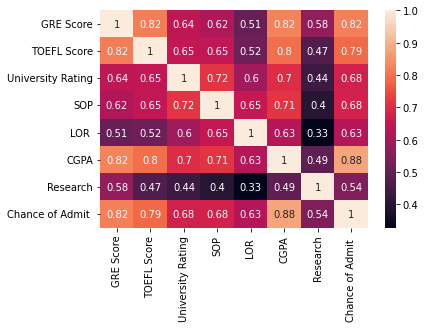

In [ ]:
train_df = pd.concat([X_train, pd.DataFrame(y_train, columns = ['Chance of Admit '])],axis = 1)
sns.heatmap(train_df.corr(),annot = True)

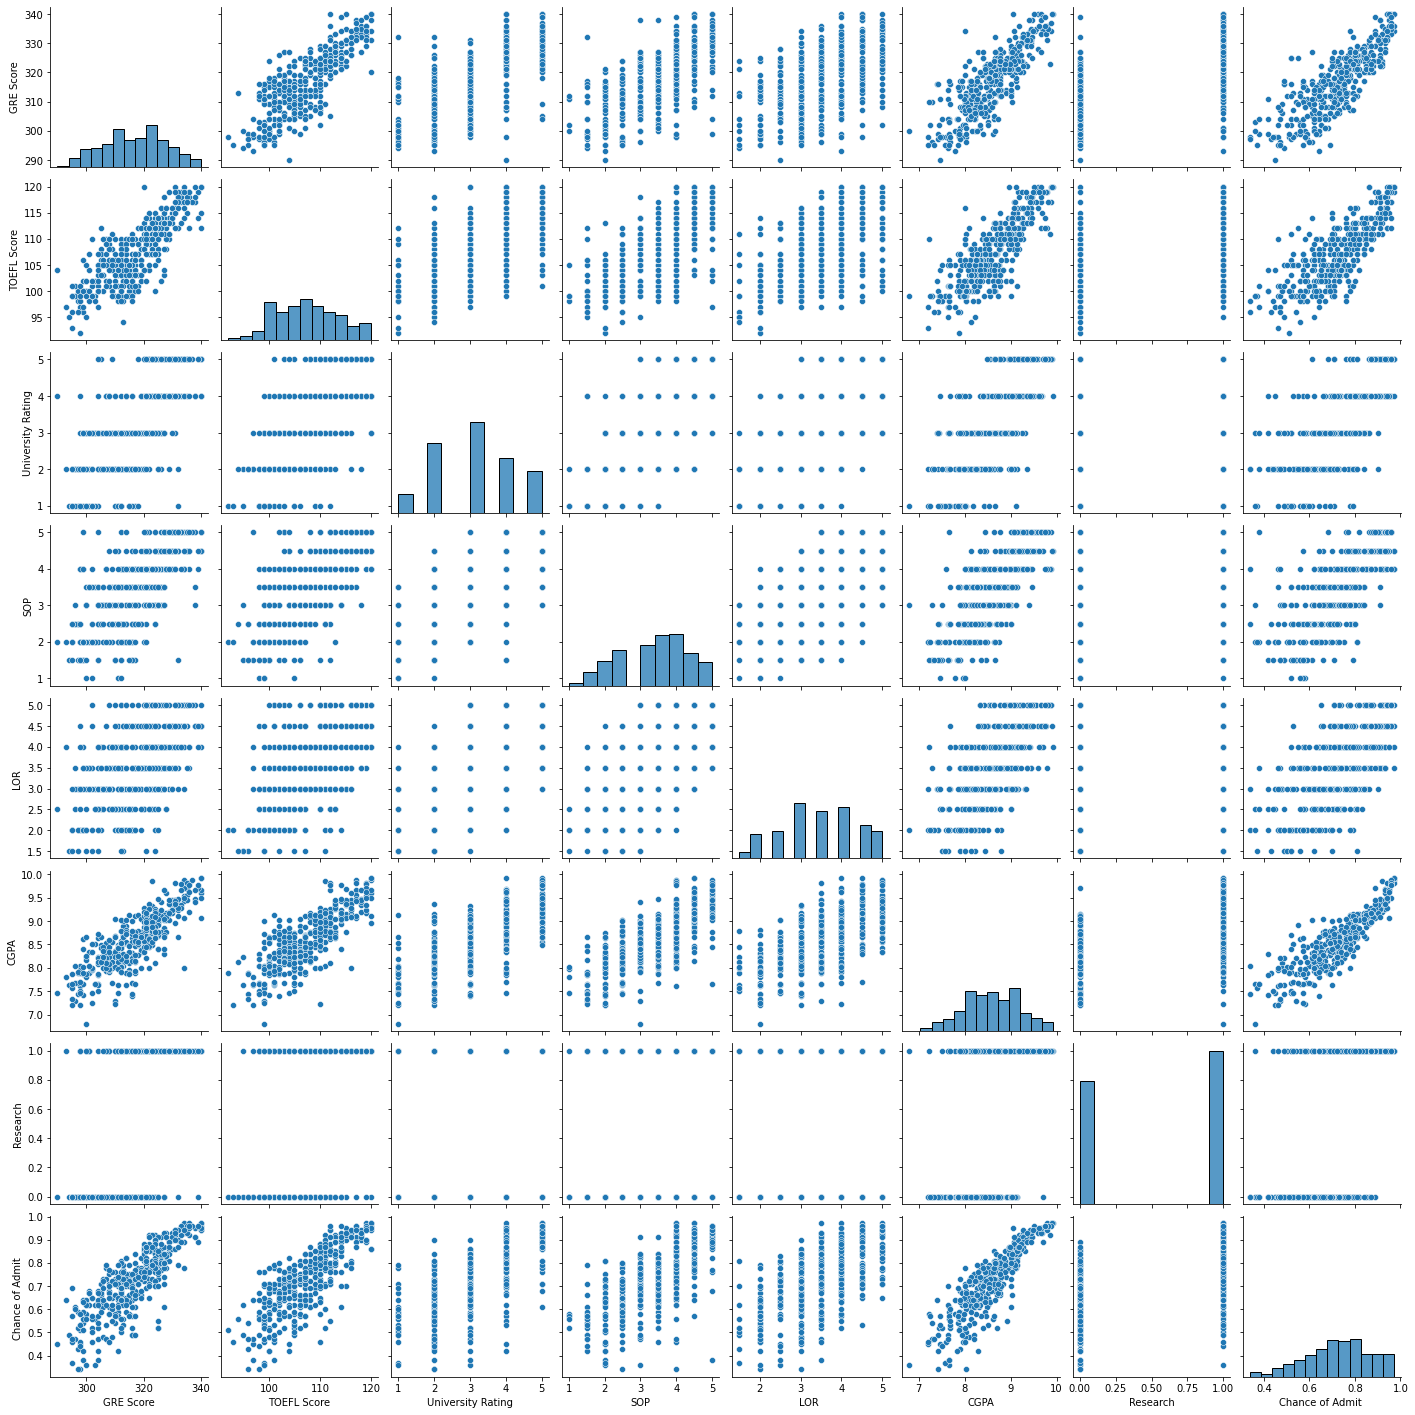

In [ ]:
# pair plot 
sns.pairplot(train_df)

In [ ]:
def CustomPlots(col,df):
  fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2,ncols=3,figsize=(25,12)) # figure of 2 rows and 3 columns subplots 
  sns.scatterplot(x=col,y = 'Chance of Admit ',data = df, ax = ax1)
  sns.distplot(x = df[col],fit = norm, color = 'red',ax = ax2)
  sns.stripplot(y = df[col], ax = ax3)
  sns.swarmplot(y = df[col], ax = ax4)
  sns.boxplot(x = df[col],ax = ax5, color = 'green')
  sns.violinplot(x = df[col],ax = ax6,color = 'b')
  ax1.title.set_text("Distribution of Data "+col+" vs Chance of Admit")
  ax2.set_xlabel(col)
  ax2.title.set_text("Density Plot for the feature "+col)
  ax3.title.set_text("Data Distribution for the feature "+col)
  ax4.title.set_text("Swarm Plot Data Distribution ")
  ax5.title.set_text("Box plot on the feature "+col)
  ax6.title.set_text("Violin Plot on the feature "+col)

In [ ]:
admission_data_cols = train_df.columns.tolist()
admission_data_cols.remove('Research')
admission_data_cols.remove('Chance of Admit ')

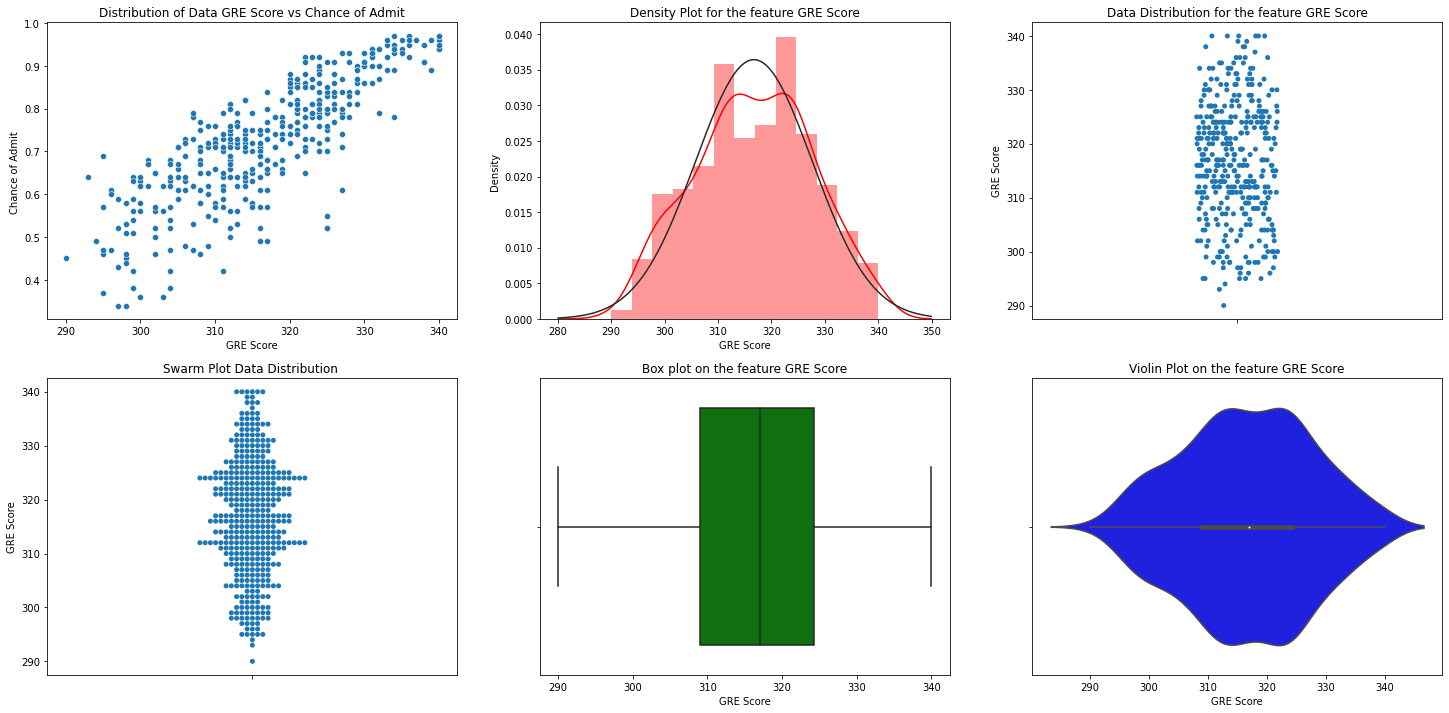

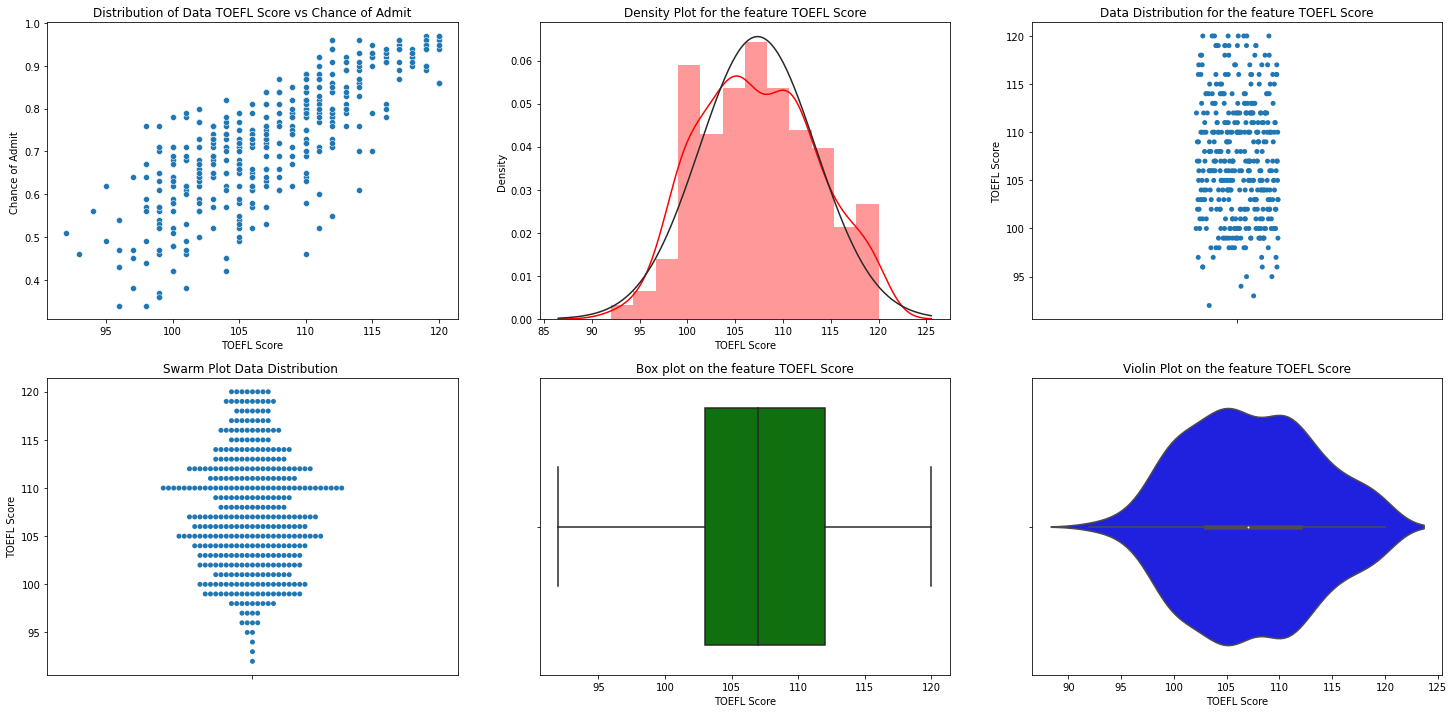

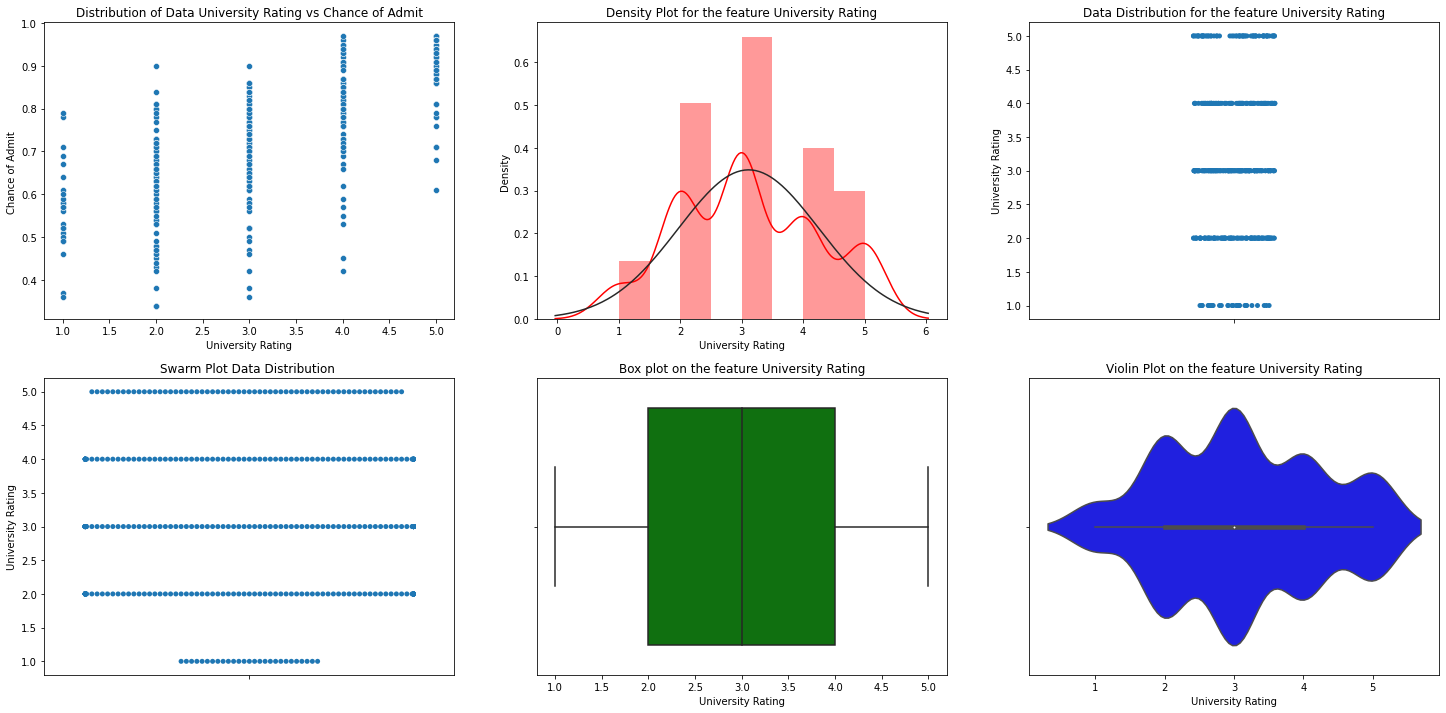

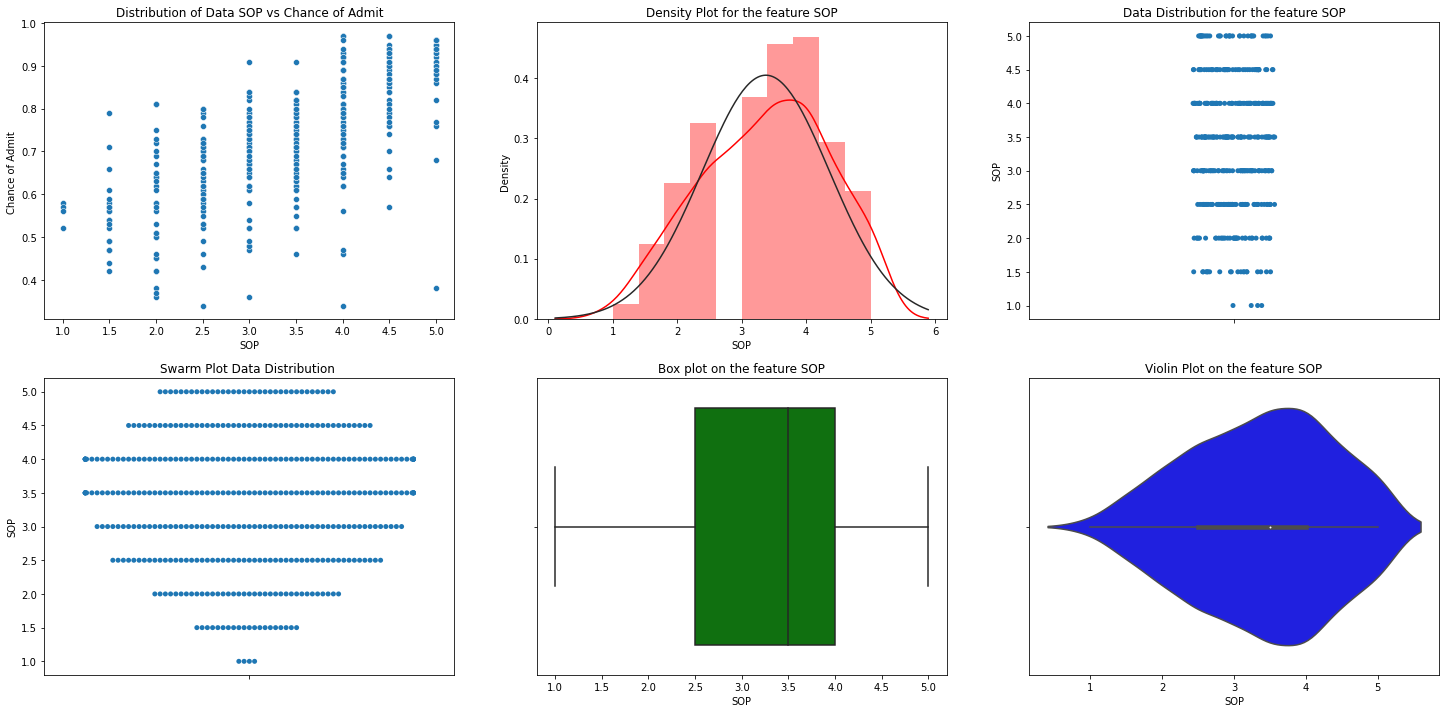

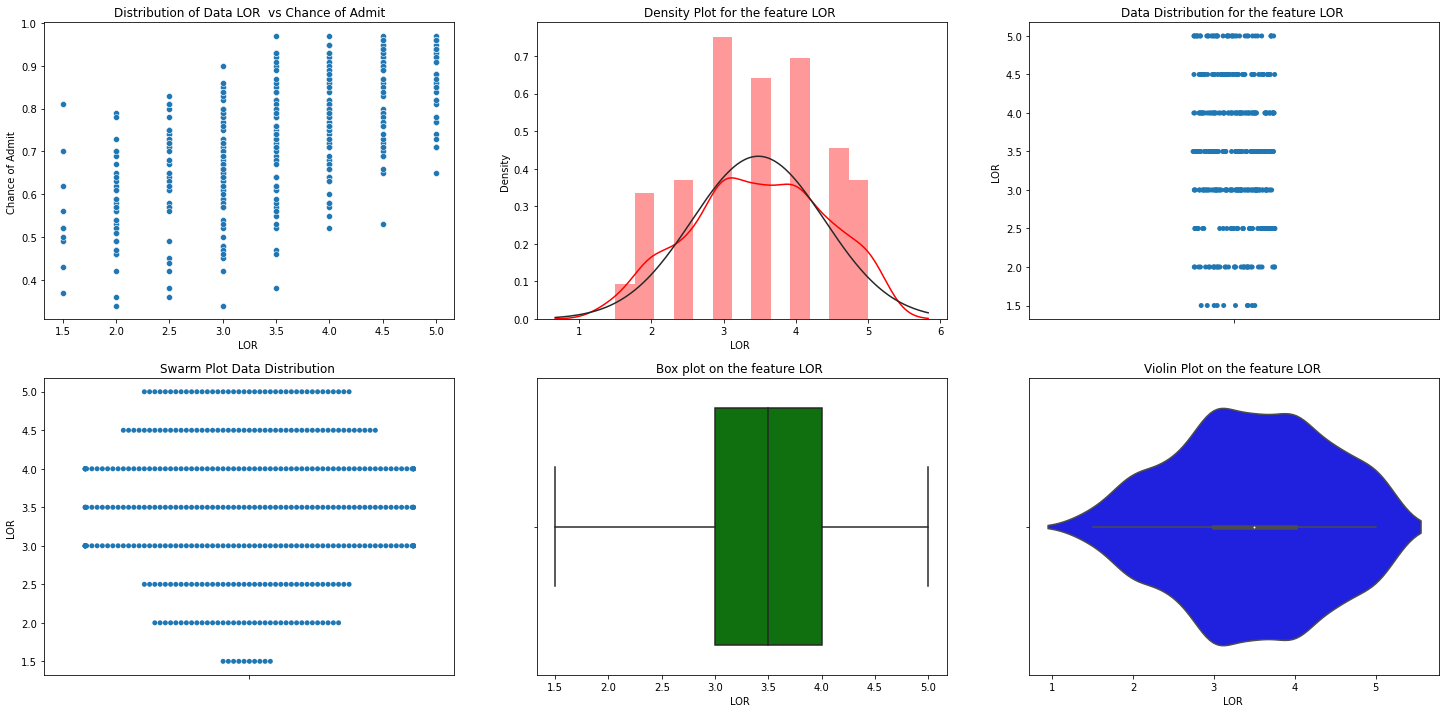

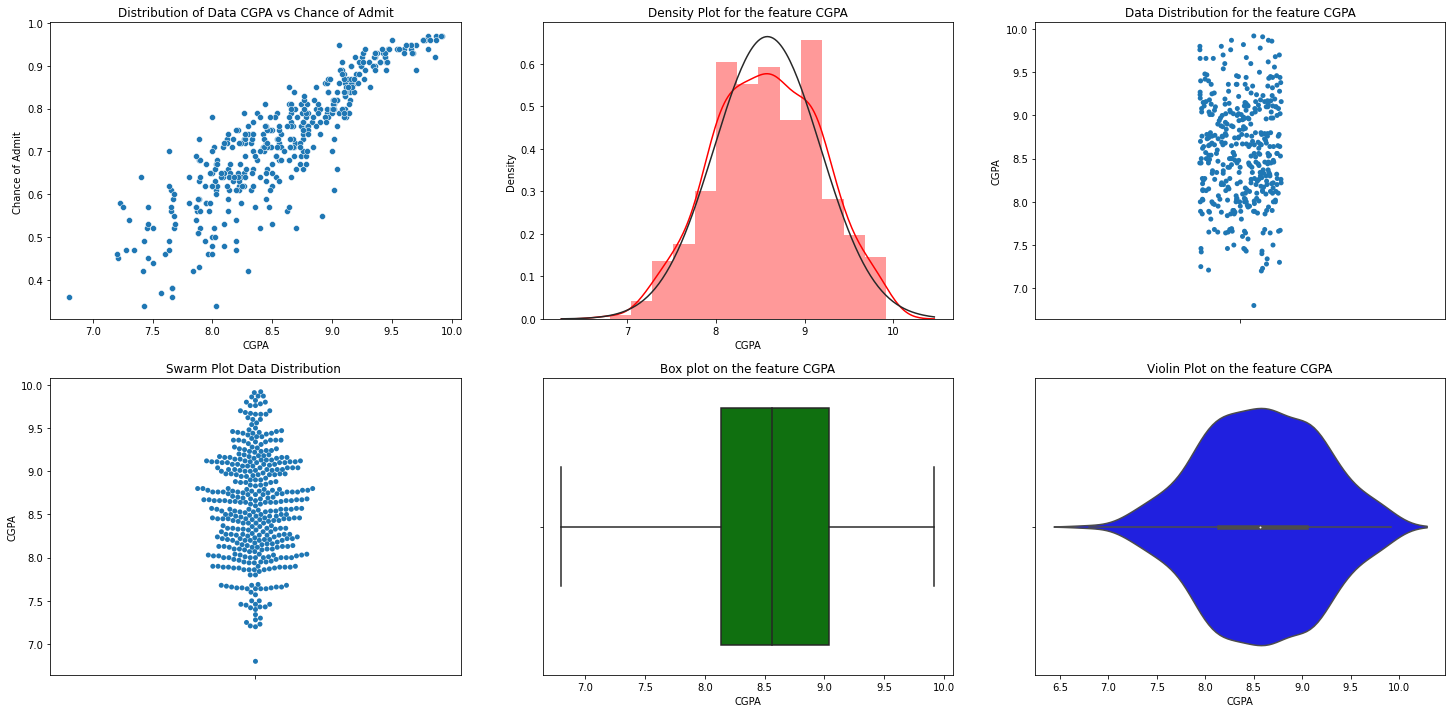

In [ ]:
for cols in admission_data_cols:
  CustomPlots(cols, train_df)

In [ ]:
def CountPlot(col_list):
  fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(25,12)) # figure of 2 rows and 3 columns subplots 
  sns.countplot(x = col_list[0], data = X_train,ax = ax1)
  sns.countplot(x = col_list[1], data = X_train,ax = ax2)
  sns.countplot(x = col_list[2], data = X_train,ax = ax3)
  sns.countplot(x = col_list[3], data = X_train,ax = ax4)


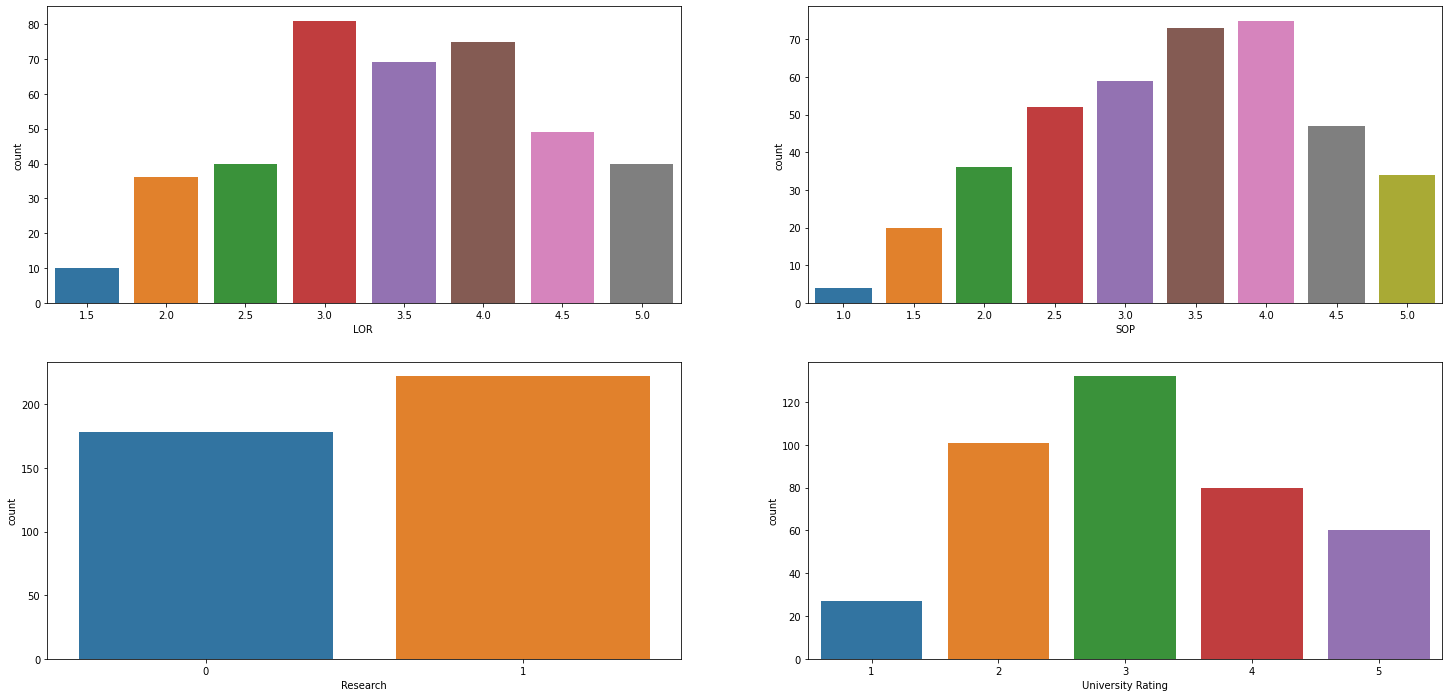

In [ ]:
categorical_cols = ['LOR ','SOP','Research','University Rating']
CountPlot(categorical_cols)

### **Data Modelling**

#### **Normalize the Data**

In [ ]:
# normalize train and test 

def NormalizeData(train,test,normalizer):
  """
  input : train , val ,test ----> train , validation and test data 
          normalizer : MM    MinMaxScaler
                       SD    StandardScaler 
                       else  No normalization 
  returns : train and test data normalized versions
  """
  if normalizer=='MM':
    normalizer=MinMaxScaler()
  elif normalizer=='SD':
    normalizer=StandardScaler()
  else:
    return train, test 
    
  train=normalizer.fit_transform(train)
  test=normalizer.transform(test)
  return train,test 

In [ ]:
# min-max scaler 
train_mm_df, test_mm_df = NormalizeData(X_train, X_test, 'MM')
# standard scaler 
train_sd_df, test_sd_df = NormalizeData(X_train, X_test, 'SD')

**Evaluations** 

1. explained_variance_score
2. max_error
3. mean_absolute_error
4. mean_squared_error
5. mean_squared_log_error
6. r2_score

#### **ML Algorithms**

1. Linear Regression 
       
       i) Lasso Regression 
       ii) Ridge Regression 
       iii) Elastic-Net Regression 

2. SVC for Regression 

3. Decision Tree Regressor 

4. Random Forest Regressor 

5. XGBoost Regressor 

6. KNN 

7. Gradient Boosting Regressor 

#### **HyperParameter Tuning**

In [ ]:
def BestParams_GridSearchCV(algo,X,y,hyperparams,folds):
  """
  input   : algo : classification algorithm 
             X : X_train 
             y : y_train 
            param_grid: hyperparameters for the ML algorithm passed
  prints  : best hyperparameters 
  """
  # Instantiate the grid search model
  grid_search = GridSearchCV(estimator = algo, param_grid =hyperparams, 
                          cv =folds,scoring="neg_root_mean_squared_error",n_jobs = -1,verbose = 1,return_train_score=True)
  # Fit the grid search to the data
  grid_search.fit(X, y)
  results=pd.DataFrame(grid_search.cv_results_)
  return results 

def HyperParamsResultsPlot(results,modelname):
  """
  input : results_acc : grid search results got using accuracy as performance measure 
          modelname   : Machine Learning Model used 
  prints : best hyperparameters 
  plots  : hyperparameters plots for given model 
  """
  print("---------------------------------------------------------------------------------------------------------")
  print(modelname)
  print("---------------------------------------------------------------------------------------------------------")
  params=results.sort_values("mean_test_score",ascending=True)
  params['ID']=[i for i in range(1,len(params['mean_test_score'])+1)]
  plt.figure(figsize=(8,5))
  fig, ((ax1)) = plt.subplots(nrows=1,ncols=1,figsize=(20,5))
  ax1.plot(params['ID'],params['mean_test_score'],color='green')
  ax1.plot(params['ID'],params['mean_train_score'],color='red')
  ax1.set_title("Mean Squared Error using Hyperparameters of "+modelname)
  ax1.set_xlabel("Hyperparameter ID")
  ax1.set_ylabel("Neg Root Mean Squared Error")
  ax1.legend(['Train RMSE','Test RMSE'])
  best_acc_params=params['params'].iloc[-1]
  print("Best hyparameters using neg_root_mean_squared_error as performance measure : \n",best_acc_params)
  return best_acc_params

def main_results(best_m,train,test,ytrain,yval):
  best_m.fit(train,ytrain)
  y_pred = pd.Series(best_m.predict(test))
  print("\nRoot Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,y_pred)))
  print("\nR2 Score :",r2_score(y_test,y_pred))
  print("Max Error : ",max_error(y_test, y_pred))
  print("Explained Variance Score : ",explained_variance_score(y_test,y_pred))
  print("Mean Absolute Error : ",mean_absolute_error(y_test,y_pred))
  print("Mean Squared Log Error :",mean_squared_log_error(y_test,y_pred))
  test_pred=pd.Series(best_m.predict(test))
  return test_pred 

def submission(ytest,filename):
  submission_file=pd.DataFrame()
  submission_file['Id']=range(1,len(X_test)+1)
  submission_file['Chance of Admit ']=ytest 
  submission_file.to_csv(filename+".csv") 
  files.download(filename+'.csv')
  return submission_file 

folds = KFold(n_splits = 5, shuffle = True, random_state = 42)

##### **Min-Max Scaling**

**1. Linear Regression**

i) Lasso Regression 
 
ii) Ridge Regression 

iii) Elastic-Net Regression 

In [ ]:
lr = LinearRegression()
lr.fit(train_mm_df, y_train)

LinearRegression()

In [ ]:
pred_test_lr= lr.predict(test_mm_df)
print("Test - Root Mean Squared Error :",np.sqrt(mean_squared_error(y_test,pred_test_lr))) 
print("Test - R2 Score : ",r2_score(y_test, pred_test_lr))
print("Test - Max Error : ",max_error(y_test, pred_test_lr))
print("Test - Explained Variance Score : ",explained_variance_score(y_test,pred_test_lr))
print("Test - Mean Absolute Error : ",mean_absolute_error(y_test,pred_test_lr))
print("Test - Mean Squared Log Error :",mean_squared_log_error(y_test,pred_test_lr))

Test - Root Mean Squared Error : 0.0608658804157831
Test - R2 Score :  0.8188432567829629
Test - Max Error :  0.271932039203481
Test - Explained Variance Score :  0.82029763388095
Test - Mean Absolute Error :  0.04272265427705364
Test - Mean Squared Log Error : 0.0014040139183984113


Fitting 5 folds for each of 7 candidates, totalling 35 fits
---------------------------------------------------------------------------------------------------------
Lasso Regression
---------------------------------------------------------------------------------------------------------
Best hyparameters using neg_root_mean_squared_error as performance measure : 
 {'alpha': 0.0001}


<Figure size 576x360 with 0 Axes>

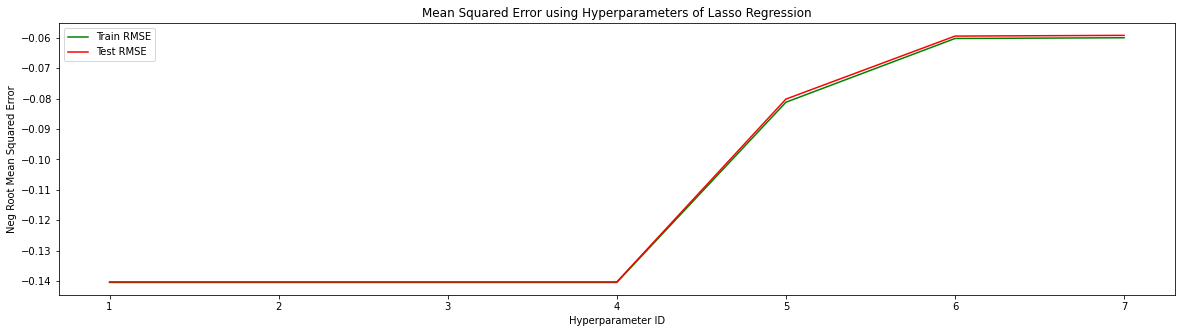

In [ ]:
# Lasso Regression 

lasso_reg=Lasso(random_state=42)

hyper_params_lasso={
'alpha': [0.0001,0.001,0.01,0.1,1,100,1000]
}

best_params_lasso=HyperParamsResultsPlot(BestParams_GridSearchCV(lasso_reg, train_mm_df,y_train,hyper_params_lasso,folds),"Lasso Regression")

In [ ]:
# best lasso model 
best_lasso=Lasso(alpha = 0.0001)
lasso_test_pred=main_results(best_lasso,train_mm_df,test_mm_df,y_train,y_test)


Root Mean Squared Error :  0.060815264939116785

R2 Score : 0.8191444278916887
Max Error :  0.2717563212087886
Explained Variance Score :  0.8206221755021467
Mean Absolute Error :  0.04265738965713783
Mean Squared Log Error : 0.0014022389358283596


Fitting 5 folds for each of 7 candidates, totalling 35 fits
---------------------------------------------------------------------------------------------------------
Ridge Regression
---------------------------------------------------------------------------------------------------------
Best hyparameters using neg_root_mean_squared_error as performance measure : 
 {'alpha': 0.01}


<Figure size 576x360 with 0 Axes>

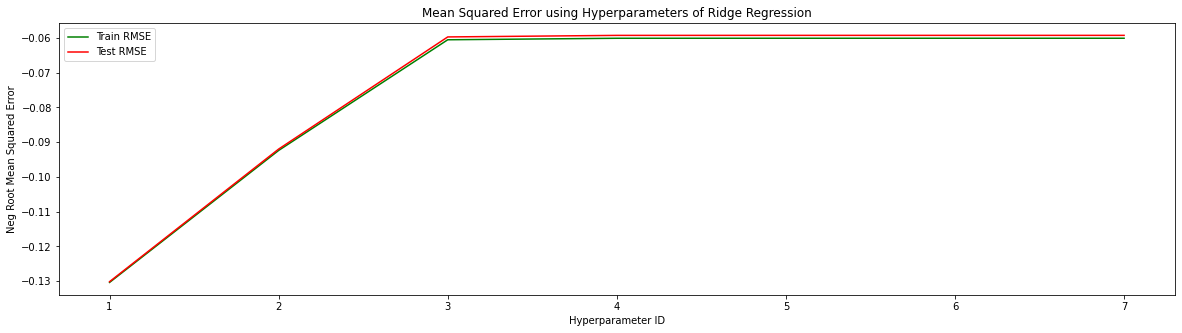

In [ ]:
# Ridge Regression 

ridge_reg=Ridge(random_state=42)

hyper_params_ridge={
'alpha': [0.0001,0.001,0.01,0.1,1,100,1000]
}

best_params_ridge=HyperParamsResultsPlot(BestParams_GridSearchCV(ridge_reg, train_mm_df,y_train,hyper_params_ridge,folds),"Ridge Regression")

In [ ]:
# best ridge model 
best_ridge=Ridge(alpha = 0.01)
ridge_test_pred=main_results(best_ridge,train_mm_df,test_mm_df,y_train,y_test)


Root Mean Squared Error :  0.060870666684327765

R2 Score : 0.8188147646653042
Max Error :  0.2719369554356352
Explained Variance Score :  0.8202678949715125
Mean Absolute Error :  0.04273214900376762
Mean Squared Log Error : 0.0014042885303520414


Fitting 5 folds for each of 63 candidates, totalling 315 fits
---------------------------------------------------------------------------------------------------------
ElasticNet Regression
---------------------------------------------------------------------------------------------------------
Best hyparameters using neg_root_mean_squared_error as performance measure : 
 {'alpha': 0.0001, 'l1_ratio': 0.9}


<Figure size 576x360 with 0 Axes>

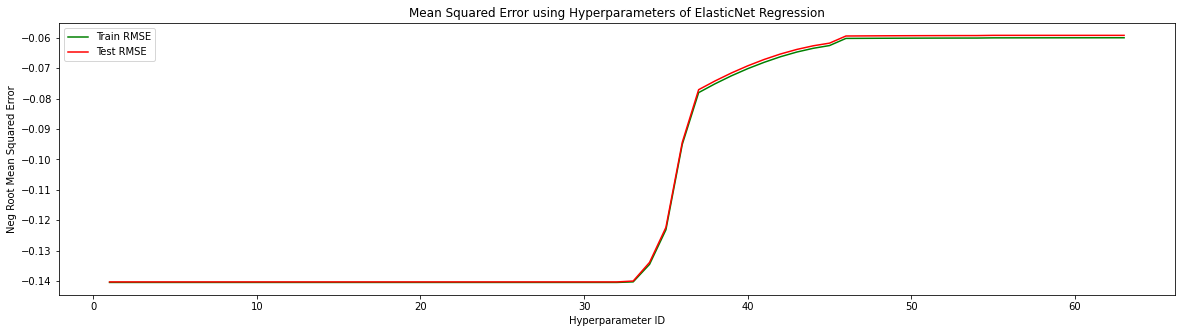

In [ ]:
# Elastic-Net Regression 

elastic_reg=ElasticNet(random_state=42)

hyper_params_elastic={
'alpha': [0.0001,0.001,0.01,0.1,1,100,1000],
'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
}

best_params_elastic=HyperParamsResultsPlot(BestParams_GridSearchCV(elastic_reg, train_mm_df,y_train,hyper_params_elastic,folds),"ElasticNet Regression")

In [ ]:
# best elastic net model 
best_elastic=ElasticNet(alpha = 0.0001,l1_ratio = 0.9)
elastic_test_pred=main_results(best_elastic,train_mm_df,test_mm_df,y_train,y_test)


Root Mean Squared Error :  0.06082183257299114

R2 Score : 0.8191053634456251
Max Error :  0.27177484681992053
Explained Variance Score :  0.8205803466839761
Mean Absolute Error :  0.04266750464704796
Mean Squared Log Error : 0.0014025081269283402


**SVM Regression** 


Fitting 5 folds for each of 10 candidates, totalling 50 fits
---------------------------------------------------------------------------------------------------------
SVM Regression
---------------------------------------------------------------------------------------------------------
Best hyparameters using neg_root_mean_squared_error as performance measure : 
 {'C': 1000, 'kernel': 'linear'}


<Figure size 576x360 with 0 Axes>

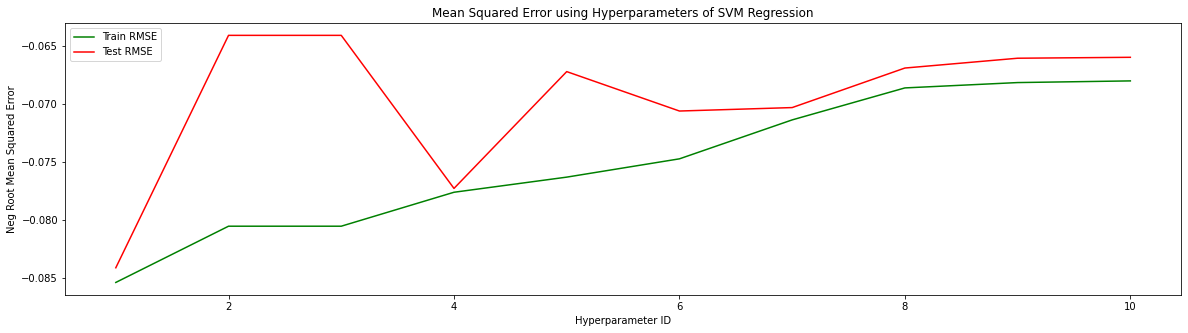

In [ ]:
# SVM Regression 

svm_reg=SVR()

hyper_params_svm={
'C': [0.01,0.1,1,100,1000],
'kernel':['linear', 'rbf'] 
}

best_params_svm=HyperParamsResultsPlot(BestParams_GridSearchCV(svm_reg, train_mm_df,y_train,hyper_params_svm,folds),"SVM Regression")

In [ ]:
# best svm model 
best_svm=SVR(C=1000,kernel = 'linear')
svm_test_pred=main_results(best_svm,train_mm_df,test_mm_df,y_train,y_test)


Root Mean Squared Error :  0.06619251391992534

R2 Score : 0.7857482200958675
Max Error :  0.24064618093963658
Explained Variance Score :  0.8112946815538863
Mean Absolute Error :  0.05275039999236247
Mean Squared Log Error : 0.0016094222918514877


**Decision Tree Regressor**

Fitting 5 folds for each of 128 candidates, totalling 640 fits
---------------------------------------------------------------------------------------------------------
Decision Tree Regression
---------------------------------------------------------------------------------------------------------
Best hyparameters using neg_root_mean_squared_error as performance measure : 
 {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 10, 'splitter': 'best'}


<Figure size 576x360 with 0 Axes>

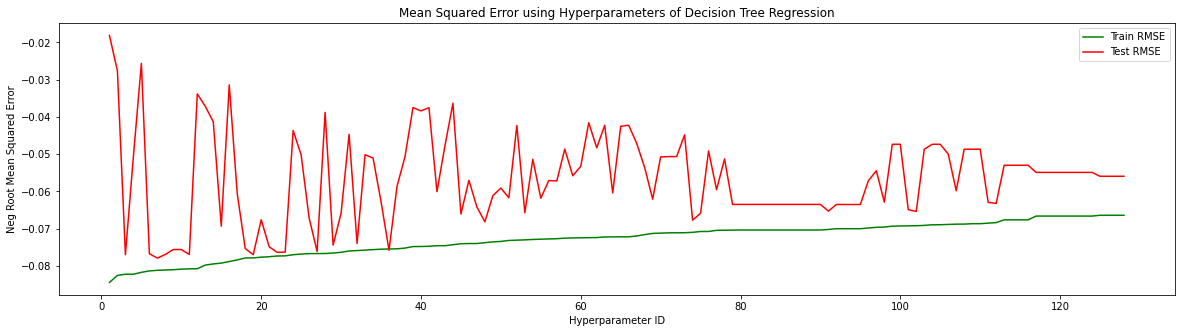

In [ ]:
# Decision Tree Regression 

dt_reg=DecisionTreeRegressor()

hyper_params_dt={
'splitter': ['best','random'],
'max_depth':[3,5,7,10],
'min_samples_split': [2,5,7,10],
'min_samples_leaf': [1,3,5,10]
}

best_params_dt=HyperParamsResultsPlot(BestParams_GridSearchCV(dt_reg, train_mm_df,y_train,hyper_params_dt,folds),"Decision Tree Regression")

In [ ]:
# best DT Regressor model  
best_dt=DecisionTreeRegressor(max_depth = 5, min_samples_leaf = 10, min_samples_split = 10, splitter = 'best')
dt_test_pred=main_results(best_dt,train_mm_df,test_mm_df,y_train,y_test)


Root Mean Squared Error :  0.06840485221986567

R2 Score : 0.7711870998913614
Max Error :  0.25200000000000006
Explained Variance Score :  0.7725645900783304
Mean Absolute Error :  0.04804064237104483
Mean Squared Log Error : 0.0017657407902632572


**Random Forest Regressor**

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
---------------------------------------------------------------------------------------------------------
Random Forest Regression
---------------------------------------------------------------------------------------------------------
Best hyparameters using neg_root_mean_squared_error as performance measure : 
 {'max_depth': 5, 'max_leaf_nodes': 20, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100}


<Figure size 576x360 with 0 Axes>

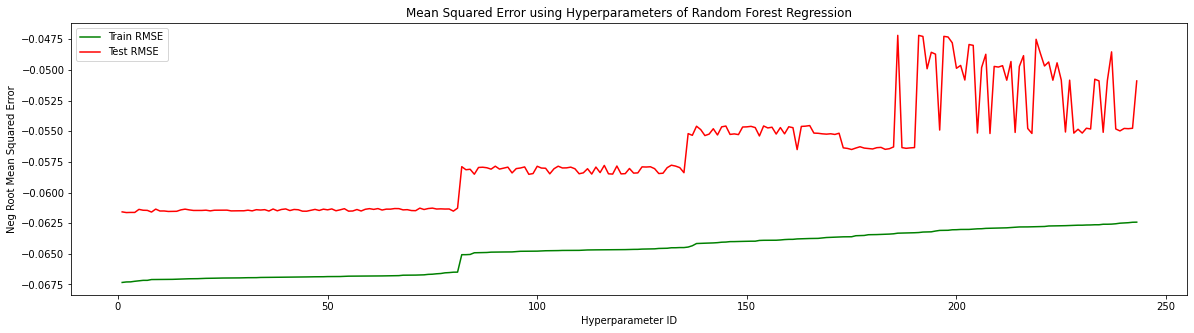

In [ ]:
# Random Forest Regression 

rf_reg=RandomForestRegressor()

hyper_params_rf={
'n_estimators': [100,200,300],
'max_depth':[3,5,7],
'min_samples_split': [2,5,10],
'min_samples_leaf': [3,5,10],
'max_leaf_nodes': [5,10,20]
}

best_params_rf=HyperParamsResultsPlot(BestParams_GridSearchCV(rf_reg, train_mm_df,y_train,hyper_params_rf,folds),"Random Forest Regression")

In [ ]:
# best Random Forest Regressor model  
best_rf=RandomForestRegressor(max_depth = 5, min_samples_leaf = 5, min_samples_split = 10, n_estimators = 100, max_leaf_nodes= 20)
rf_test_pred=main_results(best_rf,train_mm_df,test_mm_df,y_train,y_test)


Root Mean Squared Error :  0.06303752076238611

R2 Score : 0.8056856223047306
Max Error :  0.26739885837733307
Explained Variance Score :  0.8069744755304511
Mean Absolute Error :  0.04279895831858929
Mean Squared Log Error : 0.0015065801101197412


**XGBoost Regressor**

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[20:38:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
---------------------------------------------------------------------------------------------------------
XGBoost Regression
---------------------------------------------------------------------------------------------------------
Best hyparameters using neg_root_mean_squared_error as performance measure : 
 {'colsample_bytree': 0.8, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 100}


<Figure size 576x360 with 0 Axes>

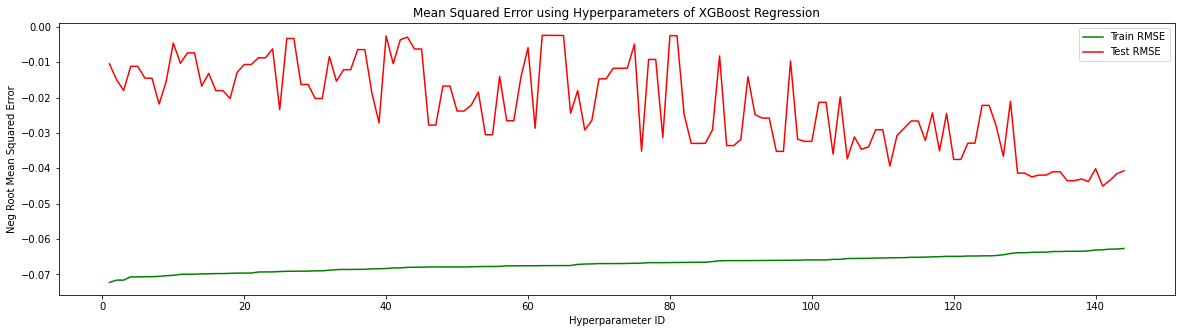

In [ ]:
# XGBoost Regression 

xg_reg=XGBRegressor()

hyper_params_xg={'max_depth': [3,5,7],
        'colsample_bytree' : [0.5,0.6,0.7,0.8],
        'min_child_weight' :[1,3,5,7],
        'n_estimators': [100,200,300]
    }

best_params_xg=HyperParamsResultsPlot(BestParams_GridSearchCV(xg_reg, train_mm_df,y_train,hyper_params_xg,folds),"XGBoost Regression")

In [ ]:
# best XGB Regressor model 
best_xgb=XGBRegressor(max_depth = 3, min_child_weight = 3, n_estimators= 100, colsample_bytree = 0.8)
xgb_test_pred=main_results(best_xgb,train_mm_df,test_mm_df,y_train,y_test)

[20:38:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Root Mean Squared Error :  0.06486863193371611

R2 Score : 0.7942327917382918
Max Error :  0.25829838514328
Explained Variance Score :  0.7954987643968928
Mean Absolute Error :  0.04508022520542145
Mean Squared Log Error : 0.0016003136313150978


**KNN**

Fitting 5 folds for each of 18 candidates, totalling 90 fits
---------------------------------------------------------------------------------------------------------
KNN Regression
---------------------------------------------------------------------------------------------------------
Best hyparameters using neg_root_mean_squared_error as performance measure : 
 {'algorithm': 'kd_tree', 'n_neighbors': 7, 'weights': 'distance'}


<Figure size 576x360 with 0 Axes>

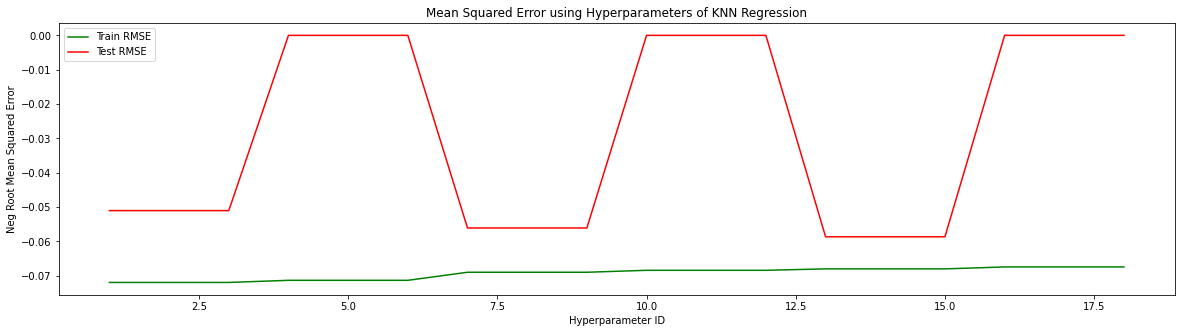

In [ ]:
# XGBoost Regression 

knn_reg=KNeighborsRegressor()

hyper_params_knn={'n_neighbors': [3,5,7],
        'weights':['uniform','distance'],
        'algorithm':['auto','ball_tree','kd_tree']
    }

best_params_knn_sd=HyperParamsResultsPlot(BestParams_GridSearchCV(knn_reg, train_mm_df,y_train,hyper_params_knn,folds),"KNN Regression")

In [ ]:
# best KNN Regressor model  

best_knn=KNeighborsRegressor(algorithm = 'kd_tree', weights = 'distance', n_neighbors= 7)
knn_test_pred=main_results(best_knn,train_mm_df,test_mm_df,y_train,y_test)


Root Mean Squared Error :  0.06760954316851903

R2 Score : 0.7764767566036266
Max Error :  0.26575409744392675
Explained Variance Score :  0.7816001979930707
Mean Absolute Error :  0.048246577626289734
Mean Squared Log Error : 0.0017660950881171486


**GBDT Regressor**

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
---------------------------------------------------------------------------------------------------------
GBDT Regression
---------------------------------------------------------------------------------------------------------
Best hyparameters using neg_root_mean_squared_error as performance measure : 
 {'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 1}


<Figure size 576x360 with 0 Axes>

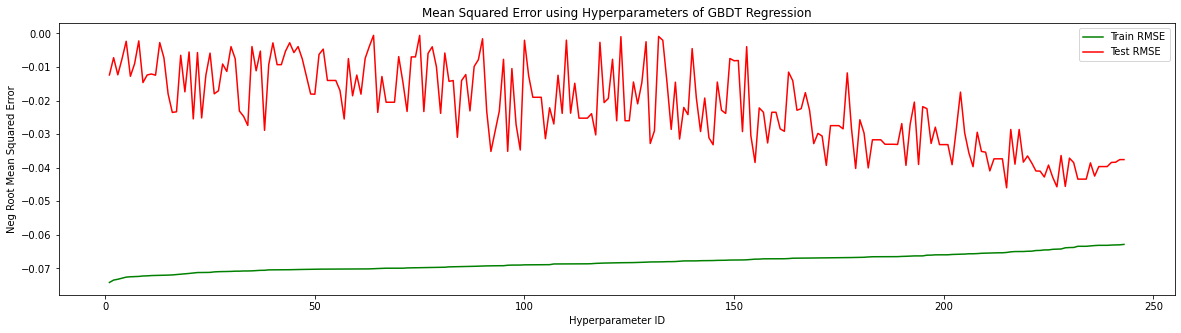

In [ ]:
# GBDT Regressor 

gbdt_reg=GradientBoostingRegressor()

hyper_params_gbdt={
        'max_depth':[3,5,7],
        'min_samples_split': [2,5,10],
        'min_samples_leaf': [3,5,10],
        'n_estimators': [100,200,300],
        'subsample':[0.5,0.8,1]
    }

best_params_gbdt=HyperParamsResultsPlot(BestParams_GridSearchCV(gbdt_reg, train_mm_df,y_train,hyper_params_gbdt,folds),"GBDT Regression")

In [ ]:
# best GBDT Regressor model  
best_gbdt=GradientBoostingRegressor(max_depth = 3, min_samples_leaf = 3, min_samples_split = 2, n_estimators = 100, subsample= 1)
gbdt_test_pred=main_results(best_gbdt,train_mm_df,test_mm_df,y_train,y_test)


Root Mean Squared Error :  0.06569878018083804

R2 Score : 0.7889325321638105
Max Error :  0.26131127367384793
Explained Variance Score :  0.7900825622683101
Mean Absolute Error :  0.04515373173832053
Mean Squared Log Error : 0.0016410763817378668


##### **Standard Scaling**

**1. Linear Regression**

i) Lasso Regression 
 
ii) Ridge Regression 

iii) Elastic-Net Regression 

In [ ]:
lr = LinearRegression()
lr.fit(train_sd_df, y_train)

LinearRegression()

In [ ]:
pred_test_lr= lr.predict(test_sd_df)
print("Test - Root Mean Squared Error :",np.sqrt(mean_squared_error(y_test,pred_test_lr))) 
print("Test - R2 Score : ",r2_score(y_test, pred_test_lr))
print("Test - Max Error : ",max_error(y_test, pred_test_lr))
print("Test - Explained Variance Score : ",explained_variance_score(y_test,pred_test_lr))
print("Test - Mean Absolute Error : ",mean_absolute_error(y_test,pred_test_lr))
print("Test - Mean Squared Log Error :",mean_squared_log_error(y_test,pred_test_lr))

Test - Root Mean Squared Error : 0.060865880415783134
Test - R2 Score :  0.8188432567829628
Test - Max Error :  0.2719320392034809
Test - Explained Variance Score :  0.8202976338809499
Test - Mean Absolute Error :  0.0427226542770537
Test - Mean Squared Log Error : 0.0014040139183984133


Fitting 5 folds for each of 7 candidates, totalling 35 fits
---------------------------------------------------------------------------------------------------------
Lasso Regression
---------------------------------------------------------------------------------------------------------
Best hyparameters using neg_root_mean_squared_error as performance measure : 
 {'alpha': 0.001}


<Figure size 576x360 with 0 Axes>

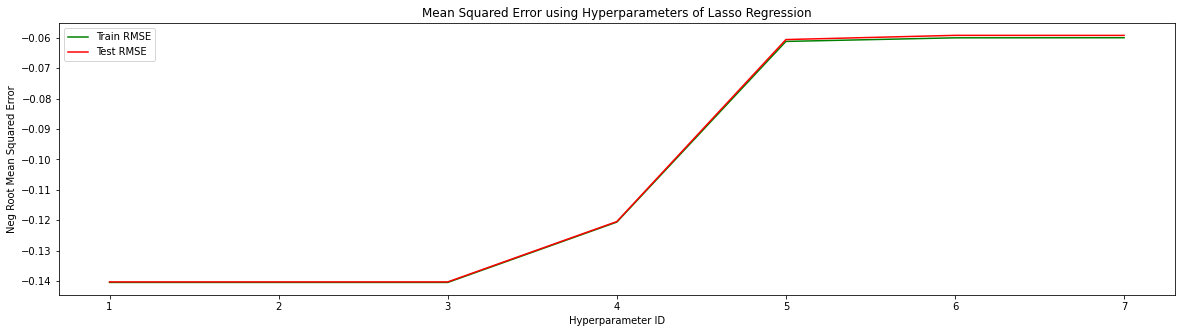

In [ ]:
# Lasso Regression 

lasso_reg=Lasso(random_state=42)

hyper_params_lasso={
'alpha': [0.0001,0.001,0.01,0.1,1,100,1000]
}

best_params_lasso_sd=HyperParamsResultsPlot(BestParams_GridSearchCV(lasso_reg, train_sd_df,y_train,hyper_params_lasso,folds),"Lasso Regression")

In [ ]:
# best lasso model 
best_lasso=Lasso(alpha = 0.001)
lasso_test_pred_SD=main_results(best_lasso,train_sd_df,test_sd_df,y_train,y_test)


Root Mean Squared Error :  0.06080880892435433

R2 Score : 0.8191828243130252
Max Error :  0.27275976376811456
Explained Variance Score :  0.8206359742666381
Mean Absolute Error :  0.042510546595840755
Mean Squared Log Error : 0.0014020799662606356


Fitting 5 folds for each of 7 candidates, totalling 35 fits
---------------------------------------------------------------------------------------------------------
Ridge Regression
---------------------------------------------------------------------------------------------------------
Best hyparameters using neg_root_mean_squared_error as performance measure : 
 {'alpha': 1}


<Figure size 576x360 with 0 Axes>

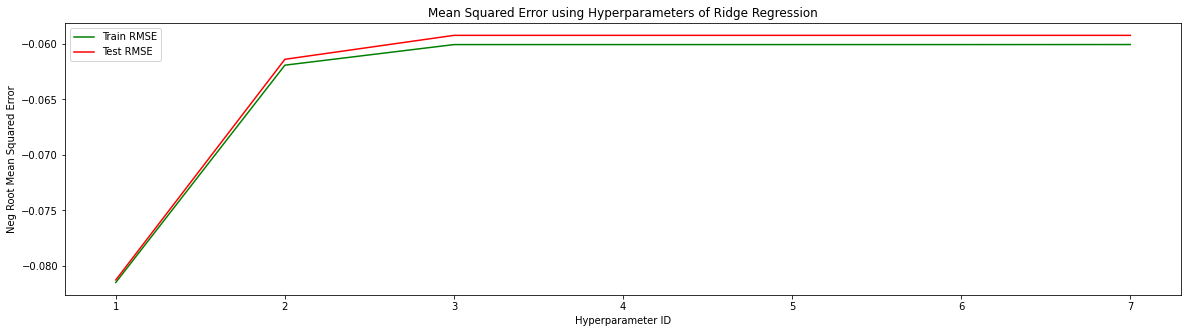

In [ ]:
# Ridge Regression 

ridge_reg=Ridge(random_state=42)

hyper_params_ridge={
'alpha': [0.0001,0.001,0.01,0.1,1,100,1000]
}

best_params_ridge_sd=HyperParamsResultsPlot(BestParams_GridSearchCV(ridge_reg, train_sd_df,y_train,hyper_params_ridge,folds),"Ridge Regression")

In [ ]:
# best ridge model 
best_ridge=Ridge(alpha = 1)
ridge_test_pred_SD=main_results(best_ridge,train_sd_df,test_sd_df,y_train,y_test)


Root Mean Squared Error :  0.060875071776539315

R2 Score : 0.8187885396675397
Max Error :  0.27198029618306147
Explained Variance Score :  0.8202389073170051
Mean Absolute Error :  0.04274719474628152
Mean Squared Log Error : 0.0014046620026198784


Fitting 5 folds for each of 63 candidates, totalling 315 fits
---------------------------------------------------------------------------------------------------------
ElasticNet Regression
---------------------------------------------------------------------------------------------------------
Best hyparameters using neg_root_mean_squared_error as performance measure : 
 {'alpha': 0.001, 'l1_ratio': 0.7}


<Figure size 576x360 with 0 Axes>

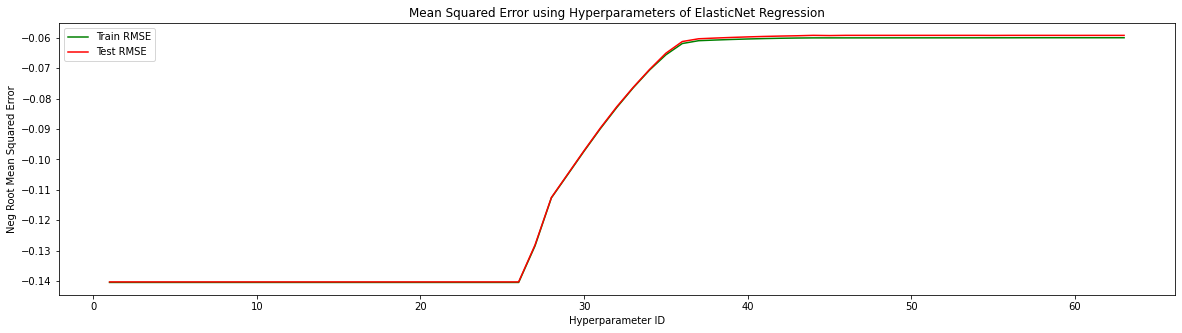

In [ ]:
# Elastic-Net Regression 

elastic_reg=ElasticNet(random_state=42)

hyper_params_elastic={
'alpha': [0.0001,0.001,0.01,0.1,1,100,1000],
'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
}

best_params_elastic_sd=HyperParamsResultsPlot(BestParams_GridSearchCV(elastic_reg, train_sd_df,y_train,hyper_params_elastic,folds),"ElasticNet Regression")

In [ ]:
# best elastic net model 
best_elastic=ElasticNet(alpha = 0.001,l1_ratio = 0.7)
elastic_test_pred_SD=main_results(best_elastic,train_sd_df,test_sd_df,y_train,y_test)


Root Mean Squared Error :  0.06082309226553079

R2 Score : 0.8190978702816005
Max Error :  0.27251376320428905
Explained Variance Score :  0.8205511594251463
Mean Absolute Error :  0.04257657316019477
Mean Squared Log Error : 0.001402567954033885


### **SVM Regression**

Fitting 5 folds for each of 10 candidates, totalling 50 fits
---------------------------------------------------------------------------------------------------------
SVM Regression
---------------------------------------------------------------------------------------------------------
Best hyparameters using neg_root_mean_squared_error as performance measure : 
 {'C': 1, 'kernel': 'linear'}


<Figure size 576x360 with 0 Axes>

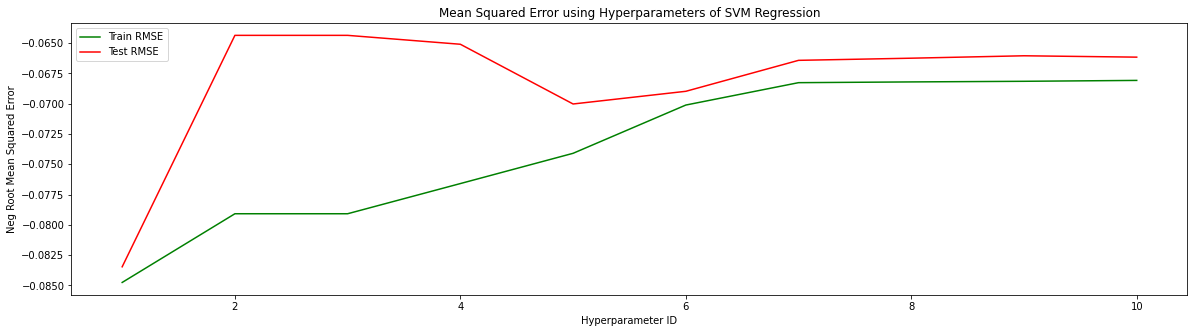

In [ ]:
# SVM Regression 

svm_reg=SVR()

hyper_params_svm={
'C': [0.01,0.1,1,100,1000],
'kernel':['linear', 'rbf'] 
}

best_params_svm_sd=HyperParamsResultsPlot(BestParams_GridSearchCV(svm_reg, train_sd_df,y_train,hyper_params_svm,folds),"SVM Regression")

In [ ]:
# best svm model 
best_svm=SVR(C=1,kernel = 'linear')
svm_test_pred_SD=main_results(best_svm,train_sd_df,test_sd_df,y_train,y_test)


Root Mean Squared Error :  0.06613518176205968

R2 Score : 0.7861192045623144
Max Error :  0.24079008988698308
Explained Variance Score :  0.8115506183445691
Mean Absolute Error :  0.05270417244593584
Mean Squared Log Error : 0.0016066778874709645


### **Decision Tree Regression**

Fitting 5 folds for each of 128 candidates, totalling 640 fits
---------------------------------------------------------------------------------------------------------
Decision Tree Regression
---------------------------------------------------------------------------------------------------------
Best hyparameters using neg_root_mean_squared_error as performance measure : 
 {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2, 'splitter': 'best'}


<Figure size 576x360 with 0 Axes>

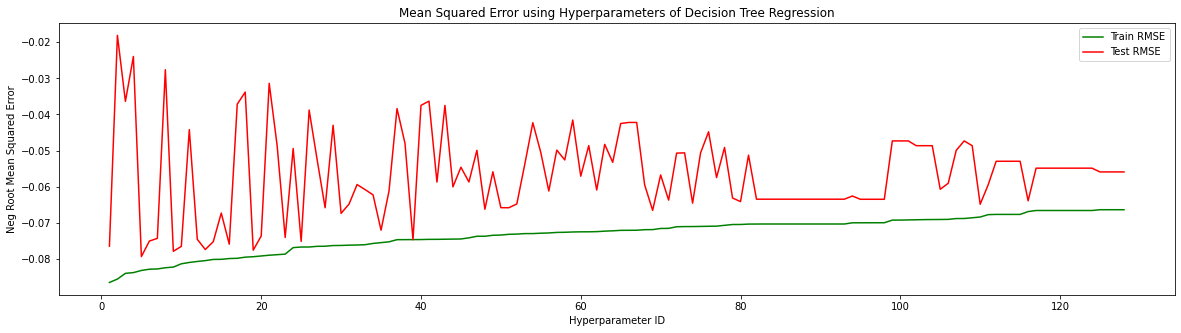

In [ ]:
# Decision Tree Regression 

dt_reg=DecisionTreeRegressor()

hyper_params_dt={
'splitter': ['best','random'],
'max_depth':[3,5,7,10],
'min_samples_split': [2,5,7,10],
'min_samples_leaf': [1,3,5,10]
}

best_params_dt_sd=HyperParamsResultsPlot(BestParams_GridSearchCV(dt_reg, train_sd_df,y_train,hyper_params_dt,folds),"Decision Tree Regression")

In [ ]:
# best DT Regressor model  
best_dt=DecisionTreeRegressor(max_depth = 5, min_samples_leaf = 10, min_samples_split = 2, splitter = 'best')
dt_test_pred_SD=main_results(best_dt,train_sd_df,test_sd_df,y_train,y_test)


Root Mean Squared Error :  0.06840485221986568

R2 Score : 0.7711870998913612
Max Error :  0.25200000000000006
Explained Variance Score :  0.7725645900783303
Mean Absolute Error :  0.04804064237104485
Mean Squared Log Error : 0.0017657407902632576


**Random Forest Regressor**

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
---------------------------------------------------------------------------------------------------------
Random Forest Regression
---------------------------------------------------------------------------------------------------------
Best hyparameters using neg_root_mean_squared_error as performance measure : 
 {'max_depth': 5, 'max_leaf_nodes': 20, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 100}


<Figure size 576x360 with 0 Axes>

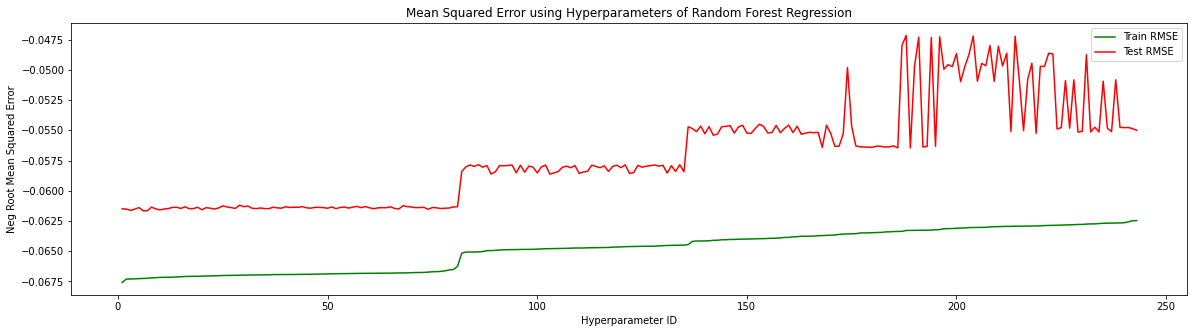

In [ ]:
# Random Forest Regression 

rf_reg=RandomForestRegressor()

hyper_params_rf={
'n_estimators': [100,200,300],
'max_depth':[3,5,7],
'min_samples_split': [2,5,10],
'min_samples_leaf': [3,5,10],
'max_leaf_nodes': [5,10,20]
}

best_params_rf_sd=HyperParamsResultsPlot(BestParams_GridSearchCV(rf_reg, train_sd_df,y_train,hyper_params_rf,folds),"Random Forest Regression")

In [ ]:
# best Random Forest Regressor model  
best_rf=RandomForestRegressor(max_depth = 5, min_samples_leaf = 10, min_samples_split = 10, n_estimators = 100, max_leaf_nodes= 20)
rf_test_pred_SD=main_results(best_rf,train_sd_df,test_sd_df,y_train,y_test)


Root Mean Squared Error :  0.06223511273222279

R2 Score : 0.8106010143377761
Max Error :  0.2738119036279005
Explained Variance Score :  0.8126227927500868
Mean Absolute Error :  0.041609131724312486
Mean Squared Log Error : 0.0014712707320759131


**XGBoost Regressor**

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[20:39:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
---------------------------------------------------------------------------------------------------------
XGBoost Regression
---------------------------------------------------------------------------------------------------------
Best hyparameters using neg_root_mean_squared_error as performance measure : 
 {'colsample_bytree': 0.8, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 100}


<Figure size 576x360 with 0 Axes>

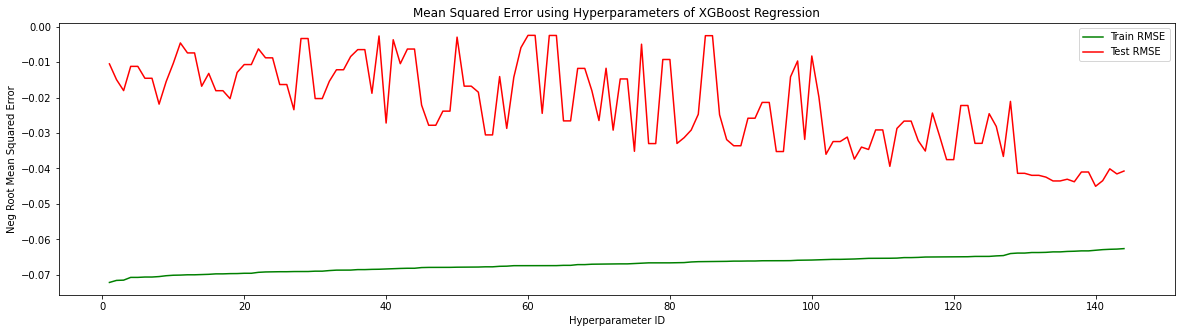

In [ ]:
# XGBoost Regression 

xg_reg=XGBRegressor()

hyper_params_xg={'max_depth': [3,5,7],
        'colsample_bytree' : [0.5,0.6,0.7,0.8],
        'min_child_weight' :[1,3,5,7],
        'n_estimators': [100,200,300]
    }

best_params_xg_sd=HyperParamsResultsPlot(BestParams_GridSearchCV(xg_reg, train_sd_df,y_train,hyper_params_xg,folds),"XGBoost Regression")

In [ ]:
# best XGB Regressor model 
best_xgb=XGBRegressor(max_depth = 3, min_child_weight = 3, n_estimators= 100, colsample_bytree = 0.8)
xgb_test_pred_SD=main_results(best_xgb,train_sd_df,test_sd_df,y_train,y_test)

[02:47:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Root Mean Squared Error :  0.06486863193371611

R2 Score : 0.7942327917382918
Max Error :  0.25829838514328
Explained Variance Score :  0.7954987643968928
Mean Absolute Error :  0.04508022520542145
Mean Squared Log Error : 0.0016003136313150978


**KNN**

Fitting 5 folds for each of 18 candidates, totalling 90 fits
---------------------------------------------------------------------------------------------------------
KNN Regression
---------------------------------------------------------------------------------------------------------
Best hyparameters using neg_root_mean_squared_error as performance measure : 
 {'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'distance'}


<Figure size 576x360 with 0 Axes>

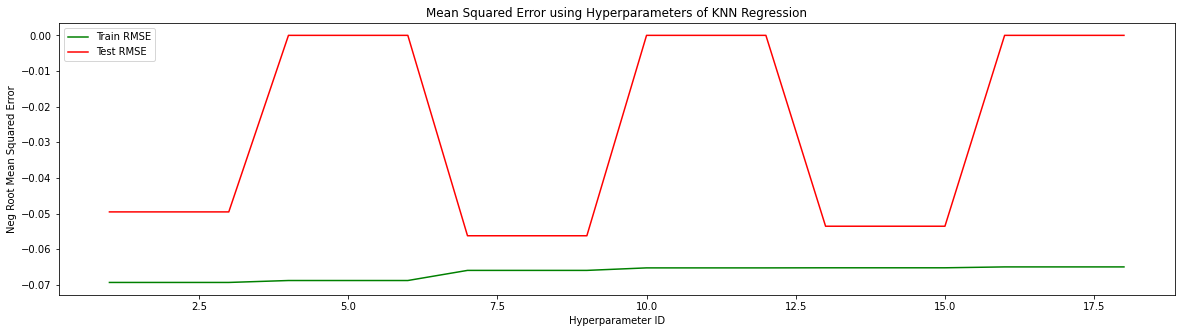

In [ ]:
# KNN Regression 

knn_reg=KNeighborsRegressor()

hyper_params_knn={'n_neighbors': [3,5,7],
        'weights':['uniform','distance'],
        'algorithm':['auto','ball_tree','kd_tree']
    }

best_params_knn_sd=HyperParamsResultsPlot(BestParams_GridSearchCV(knn_reg, train_sd_df,y_train,hyper_params_knn,folds),"KNN Regression")

In [ ]:
# best KNN Regressor model  

best_knn=KNeighborsRegressor(algorithm = 'ball_tree', weights = 'distance', n_neighbors= 5)
knn_test_pred_SD=main_results(best_knn,train_sd_df,test_sd_df,y_train,y_test)


Root Mean Squared Error :  0.06794986837311626

R2 Score : 0.7742208013729182
Max Error :  0.26527081588648194
Explained Variance Score :  0.7765812891453985
Mean Absolute Error :  0.04756861672222604
Mean Squared Log Error : 0.001764643406977091


**GBDT Regressor**

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
---------------------------------------------------------------------------------------------------------
GBDT Regression
---------------------------------------------------------------------------------------------------------
Best hyparameters using neg_root_mean_squared_error as performance measure : 
 {'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 1}


<Figure size 576x360 with 0 Axes>

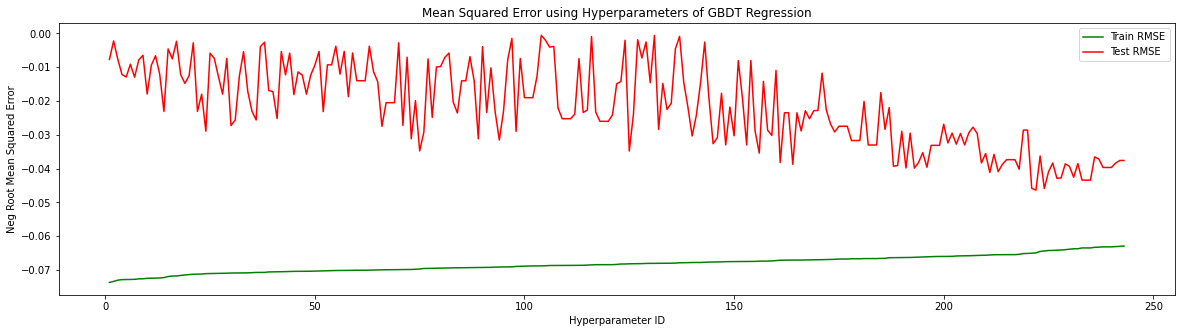

In [ ]:
# GBDT Regressor 

gbdt_reg=GradientBoostingRegressor()

hyper_params_gbdt={
        'max_depth':[3,5,7],
        'min_samples_split': [2,5,10],
        'min_samples_leaf': [3,5,10],
        'n_estimators': [100,200,300],
        'subsample':[0.5,0.8,1]
    }

best_params_gbdt=HyperParamsResultsPlot(BestParams_GridSearchCV(gbdt_reg, train_sd_df,y_train,hyper_params_gbdt,folds),"GBDT Regression")

In [ ]:
# best GBDT Regressor model  
best_gbdt=GradientBoostingRegressor(max_depth = 3, min_samples_leaf = 3, min_samples_split = 2, n_estimators = 100, subsample= 1)
gbdt_test_pred_SD=main_results(best_gbdt,train_sd_df,test_sd_df,y_train,y_test)


Root Mean Squared Error :  0.06526430513192576

R2 Score : 0.7917149376844446
Max Error :  0.26131127367384804
Explained Variance Score :  0.7931306634847606
Mean Absolute Error :  0.04476424555179265
Mean Squared Log Error : 0.0016166486316666817


#### **DL Algorithms**

1. MLP Regressor 

2. Deep Neural Networks for Regression 


**MLP Regressor**

##### **Min-Max Scaling**

Fitting 5 folds for each of 108 candidates, totalling 540 fits
---------------------------------------------------------------------------------------------------------
MLP Regression
---------------------------------------------------------------------------------------------------------
Best hyparameters using neg_root_mean_squared_error as performance measure : 
 {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': 100, 'momentum': 0.9, 'solver': 'lbfgs'}


<Figure size 576x360 with 0 Axes>

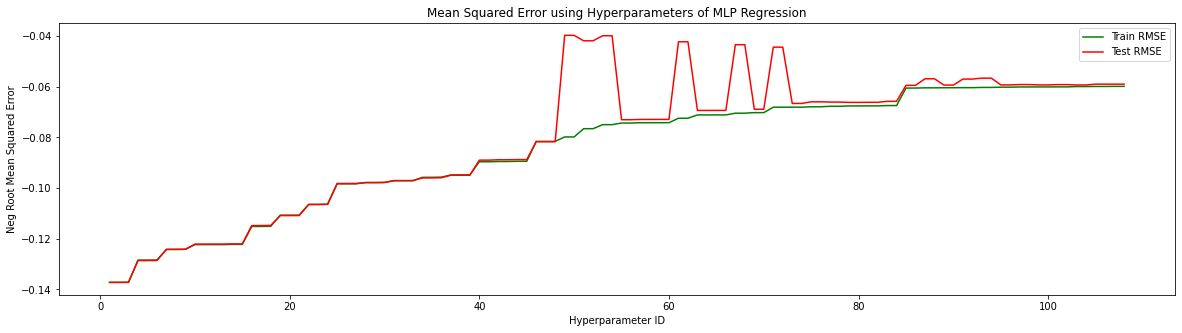

In [ ]:
# MLP Regressor 

mlp_reg=MLPRegressor(random_state = 42)

hyper_params_mlp={
        'hidden_layer_sizes':[100,200,300],
        'activation':['relu','tanh'],
        'solver':['lbfgs','sgd','adam'],
        'alpha':[0.001,0.01,0.1],
        'momentum':[0.8,0.9]
    }

best_params_mlp=HyperParamsResultsPlot(BestParams_GridSearchCV(mlp_reg, train_mm_df,y_train,hyper_params_mlp,folds),"MLP Regression")

In [ ]:
# best MLP Regressor model  
best_MLP = MLPRegressor(activation = 'tanh',alpha = 0.001, momentum = 0.9, solver = 'lbfgs', hidden_layer_sizes= 100,random_state=42)
mlp_test_pred=main_results(best_MLP,train_mm_df,test_mm_df,y_train,y_test)


Root Mean Squared Error :  0.06104496130726149

R2 Score : 0.8177756821024424
Max Error :  0.271543970258542
Explained Variance Score :  0.8192869349015344
Mean Absolute Error :  0.042622911748548944
Mean Squared Log Error : 0.0014101371358741913


##### **Standard Scaling**

Fitting 5 folds for each of 108 candidates, totalling 540 fits
---------------------------------------------------------------------------------------------------------
MLP Regression
---------------------------------------------------------------------------------------------------------
Best hyparameters using neg_root_mean_squared_error as performance measure : 
 {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': 300, 'momentum': 0.8, 'solver': 'lbfgs'}


<Figure size 576x360 with 0 Axes>

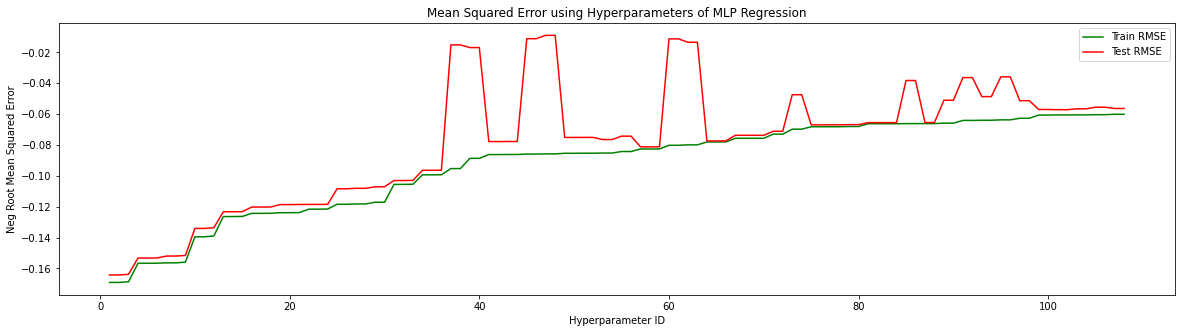

In [ ]:
# MLP Regressor 

mlp_reg=MLPRegressor(random_state = 42)

hyper_params_mlp={
        'hidden_layer_sizes':[100,200,300],
        'activation':['relu','tanh'],
        'solver':['lbfgs','sgd','adam'],
        'alpha':[0.001,0.01,0.1],
        'momentum':[0.8,0.9]
    }

best_params_mlp_sd=HyperParamsResultsPlot(BestParams_GridSearchCV(mlp_reg, train_sd_df,y_train,hyper_params_mlp,folds),"MLP Regression")

In [ ]:
# best MLP Regressor model  
best_MLP = MLPRegressor(activation = 'tanh',alpha = 0.001, momentum = 0.8, solver = 'lbfgs', hidden_layer_sizes= 300,random_state=42)
mlp_test_pred_SD=main_results(best_MLP,train_sd_df,test_sd_df,y_train,y_test)


Root Mean Squared Error :  0.06165288955737913

R2 Score : 0.8141281764902499
Max Error :  0.27323455985252537
Explained Variance Score :  0.8163473194719842
Mean Absolute Error :  0.04283740557045406
Mean Squared Log Error : 0.0014411241569553574


#### **Result Analysis**

In [ ]:
algo_list = ['Lasso','Ridge','ElasticNet','SVM','Decision Tree','Random Forest','XGBoost','KNN','GBDT','MLP']

In [ ]:
# mm scaling results 

r2_scores = [0.8191828243130252,0.8188147646653042,0.8191053634456251, 0.7861192045623144, 0.7711870998913614, 0.8056856223047306,0.7942327917382918, 0.7764767566036266,0.7889325321638105,0.8177756821024424]
max_error_scores = [0.27275976376811456,0.2719369554356352,0.27177484681992053, 0.24079008988698308, 0.25200000000000006, 0.26739885837733307,0.25829838514328, 0.26575409744392675,0.26131127367384793,0.271543970258542]
explained_variance_score = [0.8206359742666381,0.8202678949715125, 0.8205803466839761, 0.8115506183445691, 0.7725645900783304, 0.8069744755304511,0.7954987643968928,0.7816001979930707,0.7900825622683101,0.8192869349015344]
mean_absolute_error_score = [0.042510546595840755,0.04273214900376762,0.04266750464704796, 0.05270417244593584, 0.04804064237104483, 0.04279895831858929,0.04508022520542145, 0.048246577626289734,0.04515373173832053,0.042622911748548944]
mean_squared_log_error = [0.0014020799662606356,0.0014042885303520414,0.0014025081269283402, 0.0016066778874709645, 0.0017657407902632572, 0.0015065801101197412,0.0016003136313150978, 0.0017660950881171486,0.0016410763817378668,0.0014101371358741913]
rmse_error = [0.06080880892435433,0.060870666684327765,0.06082183257299114,0.06613518176205968, 0.06840485221986567, 0.06303752076238611,0.06486863193371611, 0.06760954316851903,0.06569878018083804,0.06104496130726149]

In [ ]:
# ss scaling results 

rmse_error_ss = [0.06080880892435433,0.060875071776539315,0.06082309226553079,0.06613518176205968,0.06840485221986568, 0.06223511273222279,0.06486863193371611, 0.06794986837311626,0.06526430513192576,0.06165288955737913]
r2_scores_ss = [0.8191828243130252,0.8187885396675397,0.8190978702816005,0.7861192045623144,0.7711870998913612,0.8106010143377761,0.7942327917382918,0.7742208013729182,0.7917149376844446,0.8141281764902499]
max_error_scores_ss = [0.27275976376811456,0.27198029618306147,0.27251376320428905,0.24079008988698308,0.25200000000000006, 0.2738119036279005, 0.25829838514328,0.26527081588648194,0.26131127367384804,0.27323455985252537]
explained_variance_score_ss = [0.8206359742666381,0.8202389073170051,0.8205511594251463,0.8115506183445691, 0.7725645900783303, 0.8126227927500868,0.7954987643968928,0.7765812891453985,0.7931306634847606,0.8163473194719842]
mean_absolute_error_score_ss = [0.042510546595840755,0.04274719474628152,0.04257657316019477,0.05270417244593584, 0.04804064237104485, 0.041609131724312486,0.04508022520542145,0.04756861672222604,0.04476424555179265,0.04283740557045406]
mean_squared_log_error_ss = [0.0014020799662606356,0.0014046620026198784, 0.001402567954033885, 0.0016066778874709645, 0.0017657407902632576,0.0014712707320759131,0.0016003136313150978, 0.001764643406977091, 0.0016166486316666817,0.0014411241569553574]


In [ ]:
def ErrorAnalysis(name_list,mm_list,ss_list,title,c1,c2):
  plt.figure(figsize = (10,6))
  n=10
  r = np.arange(n)
  width = 0.25
    
    
  plt.bar(r, mm_list, color = c1,
          width = width, edgecolor = 'black',
          label='MinMax Scaling')
  plt.bar(r + width, ss_list, color = c2,
          width = width, edgecolor = 'black',
          label='Standard Scaling')
    
  plt.xlabel("Algorithms")
  plt.ylabel(title+ " score")
  plt.title("Error Analysis - "+title)
    
  # plt.grid(linestyle='--')
  plt.xticks(r + width/2,name_list)
  plt.legend()
    
  plt.show()


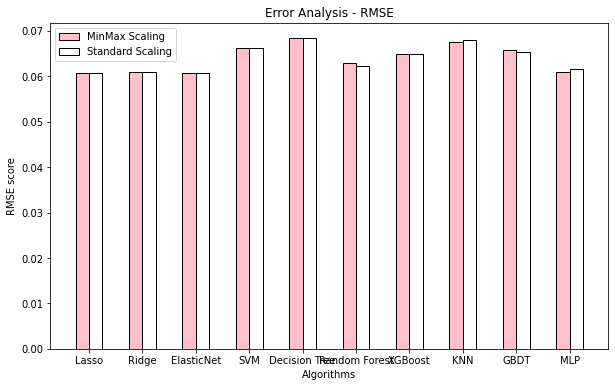

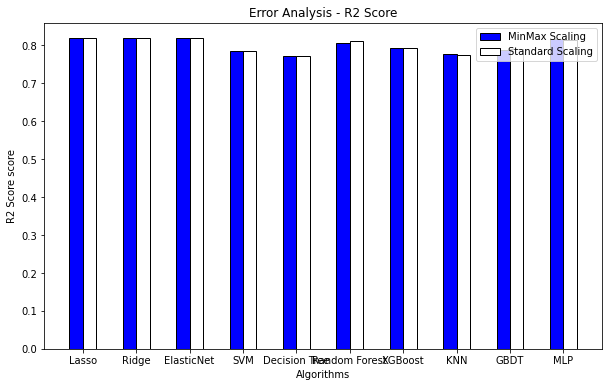

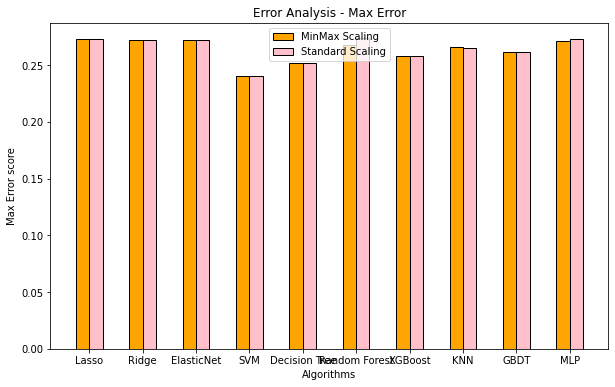

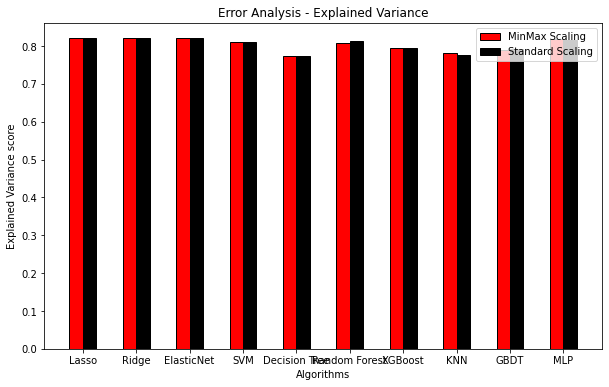

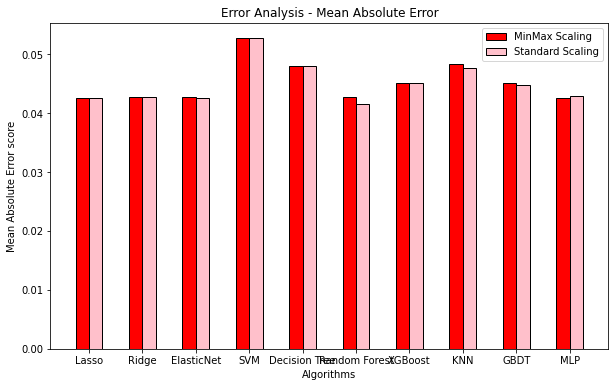

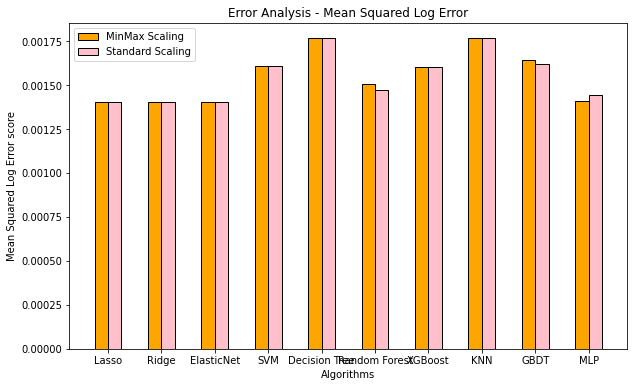

In [ ]:
error_analysis_list = [[rmse_error,rmse_error_ss,'RMSE','pink','white'],[r2_scores,r2_scores_ss,'R2 Score','blue','white'],[max_error_scores,max_error_scores_ss,'Max Error','orange','pink'],[explained_variance_score,explained_variance_score_ss,'Explained Variance','red','black'],[mean_absolute_error_score,mean_absolute_error_score_ss,'Mean Absolute Error','red','pink'],[mean_squared_log_error,mean_squared_log_error_ss,'Mean Squared Log Error','orange','pink']]
for l in error_analysis_list:
  ErrorAnalysis(algo_list, l[0], l[1],l[2],l[3],l[4])

### **Feature Importance**

In [ ]:
eli5.show_weights(best_lasso, top=-1, feature_names = X_train.columns.tolist())

In [ ]:
eli5.show_weights(best_xgb, top=-1, feature_names = X_train.columns.tolist())

In [ ]:
importance = best_lasso.coef_
importance 

array([0.12116445, 0.0833865 , 0.01063349, 0.00701197, 0.05995127,
       0.34925999, 0.02423828])

Feature: 0, Score: 0.12116
Feature: 1, Score: 0.08339
Feature: 2, Score: 0.01063
Feature: 3, Score: 0.00701
Feature: 4, Score: 0.05995
Feature: 5, Score: 0.34926
Feature: 6, Score: 0.02424


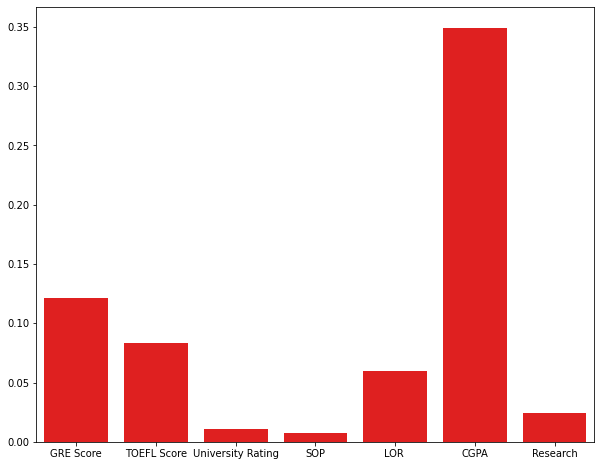

In [ ]:
# summarize feature importance
plt.figure(figsize = (10,8))
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
x = X_train.columns.tolist()
y = importance
sns.barplot(x = x, y=y, color = 'red')
plt.show()

### **End User Visualization**

In [ ]:
"""
def TestResult(toefl_score, gre_score, cgpa, sop, lor, university_rating, research_rating):
   df = pd.DataFrame.from_dict({'GRE Score':[gre_score],
                                'TOEFL Score': [toefl_score],
                                'University Rating': [university_rating],  
                                'SOP': [sop],
                                'LOR': [lor],
                                'CGPA': [cgpa],
                                'Research': [research_rating]})
   train_mm_df, test_mm_df = NormalizeData(X_train, df, 'MM')

   test_pred=pd.Series(best_lasso.predict(test_mm_df))
   return test_pred[0]

def GetRecommendation(toefl_score, gre_score, cgpa, sop, lor, university_rating, research_rating):
   u_rankings = []
   print(university_rating)
   for i in range(1,6):
     if i!=university_rating:
       u_rankings.append(i)
   admit_chance = []
   for rank in u_rankings:
     admit_chance.append([rank,TestResult(toefl_score, gre_score, cgpa, sop, lor, rank, research_rating)])
   print(admit_chance)
   return 
"""

In [ ]:
def GetChanceOfAdmit(toefl_score, gre_score, cgpa, sop, lor, university_rating, research_rating,recommendation=1):
   df = pd.DataFrame.from_dict({'GRE Score':[gre_score],
                                'TOEFL Score': [toefl_score],
                                'University Rating': [university_rating],  
                                'SOP': [sop],
                                'LOR': [lor],
                                'CGPA': [cgpa],
                                'Research': [research_rating]})

   train_mm_df, test_mm_df = NormalizeData(X_train, df, 'MM')

   test_pred=pd.Series(best_lasso.predict(test_mm_df))
   #if recommendation:
     #GetRecommendation(toefl_score, gre_score, cgpa, sop, lor, university_rating, research_rating)

   return json.dumps({'Chance of Admit ': test_pred[0]})

In [ ]:
toefl_score = gr.inputs.Slider(minimum=0, maximum=120, default=92, label="TOEFL Score")
gre_score = gr.inputs.Slider(minimum=260, maximum=340, default=290, label="GRE Score")
cgpa= gr.inputs.Slider(minimum=4, maximum=10, default=6, label="CGPA")
sop = gr.inputs.Slider(minimum=1, maximum=5, default=1 , label="Statement of Purpose Rating")
lor = gr.inputs.Slider(minimum=1, maximum=5, default=1, label="Letter of Recommendation Rating")
university_rating = gr.inputs.Radio(["1","2","3","4","5"],default=3, label="University Rating")
research_rating = gr.inputs.Radio(["0","1"],default=0, label="Research Rating")
gr.Interface(GetChanceOfAdmit, [toefl_score, gre_score, cgpa, sop, lor, university_rating, research_rating], "label", live=True, interpretation="default").launch(debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://13085.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


### **Additional Analysis**

In [ ]:
def UniversityRatingAnalysis():
  fig, ((ax1,ax2,ax3,ax4,ax5),(ax6,ax7,ax8,ax9,ax10),(ax11,ax12,ax13,ax14,ax15),(ax16,ax17,ax18,ax19,ax20)) = plt.subplots(nrows=4,ncols=5,figsize=(30,25)) # figure of 2 rows and 3 columns subplots 
  sns.catplot(x="University Rating", y="CGPA", data=X_train,ax = ax1)
  sns.catplot(x="University Rating", y="SOP", data=X_train,ax = ax2)
  sns.catplot(x="University Rating", y="LOR ", data=X_train,ax = ax3)
  sns.catplot(x="University Rating", y="GRE Score", data=X_train,ax = ax4)
  sns.catplot(x="University Rating", y="TOEFL Score", data=X_train,ax = ax5)
  sns.catplot(x="University Rating", y="CGPA", hue = 'Research',data=X_train,ax = ax6)
  sns.catplot(x="University Rating", y="SOP",hue = 'Research', data=X_train,ax = ax7)
  sns.catplot(x="University Rating", y="LOR ", hue = 'Research',data=X_train,ax = ax8)
  sns.catplot(x="University Rating", y="GRE Score", hue = 'Research',data=X_train,ax = ax9)
  sns.catplot(x="University Rating", y="TOEFL Score", hue = 'Research',data=X_train,ax = ax10)
  sns.catplot(x="University Rating", y="CGPA", kind = 'box',data=X_train,ax = ax11)
  sns.catplot(x="University Rating", y="SOP",kind = 'box', data=X_train,ax = ax12)
  sns.catplot(x="University Rating", y="LOR ", kind = 'box',data=X_train,ax = ax13)
  sns.catplot(x="University Rating", y="GRE Score", kind = 'box',data=X_train,ax = ax14)
  sns.catplot(x="University Rating", y="TOEFL Score", kind = 'box',data=X_train,ax = ax15)
  sns.catplot(x="University Rating", y="CGPA",kind = 'box', hue = 'Research',data=X_train,ax = ax16)
  sns.catplot(x="University Rating", y="SOP",kind = 'box',hue = 'Research', data=X_train,ax = ax17)
  sns.catplot(x="University Rating", y="LOR ", kind = 'box',hue = 'Research',data=X_train,ax = ax18)
  sns.catplot(x="University Rating", y="GRE Score",kind = 'box', hue = 'Research',data=X_train,ax = ax19)
  sns.catplot(x="University Rating", y="TOEFL Score",kind = 'box', hue = 'Research',data=X_train,ax = ax20)
  plt.show()

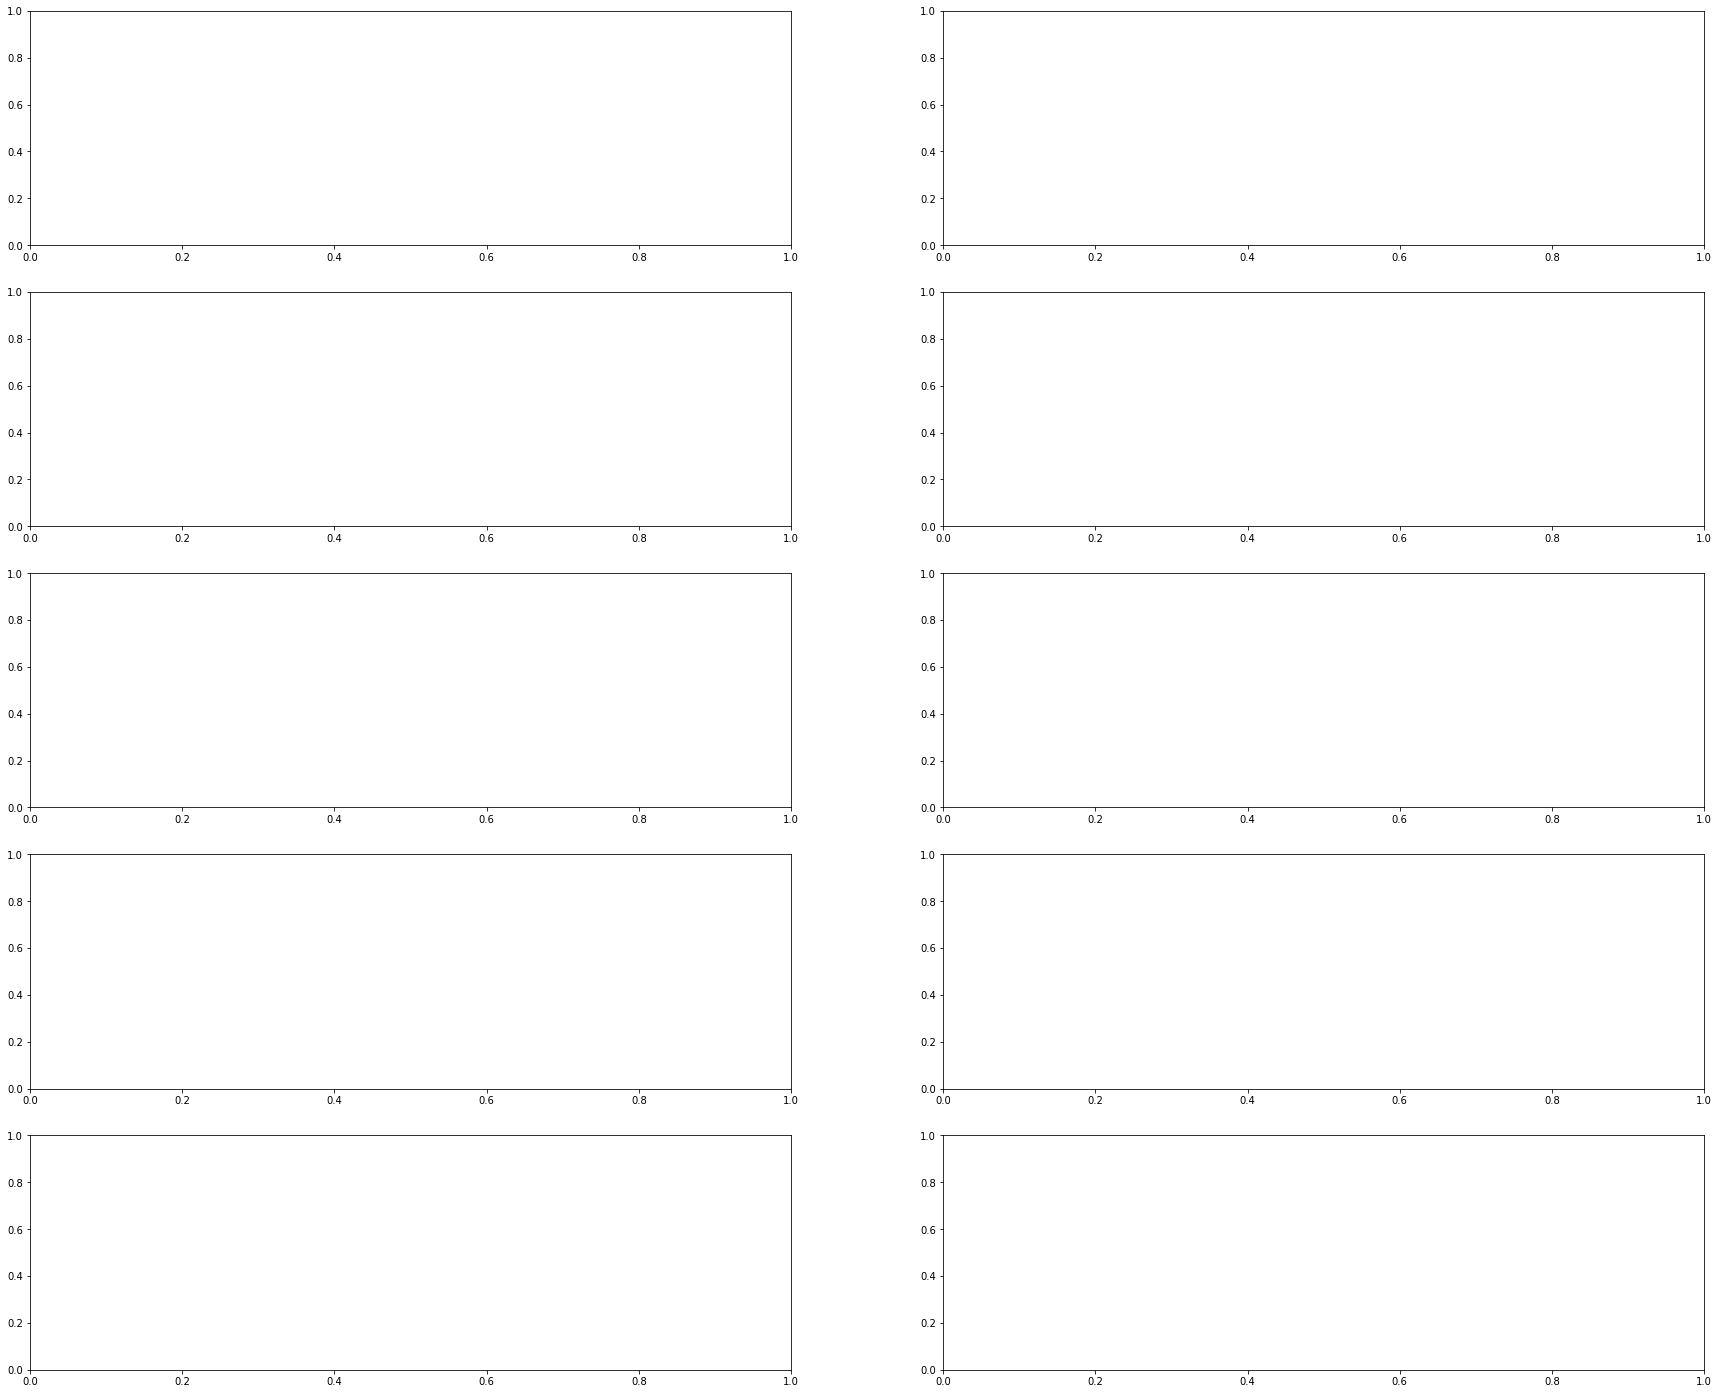

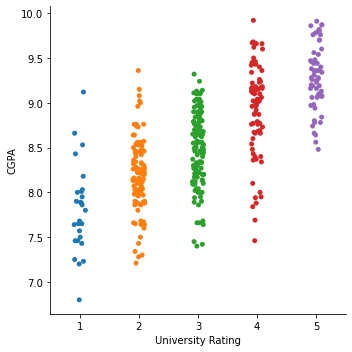

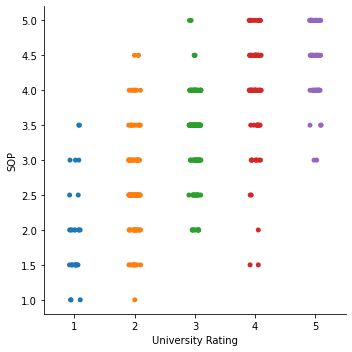

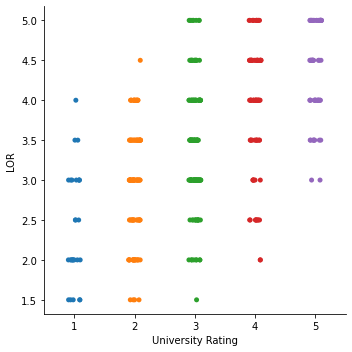

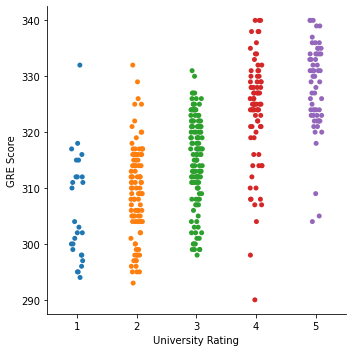

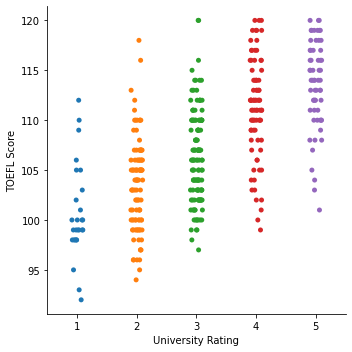

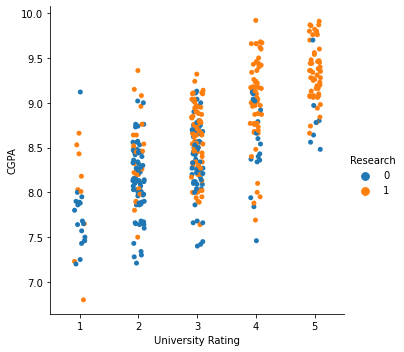

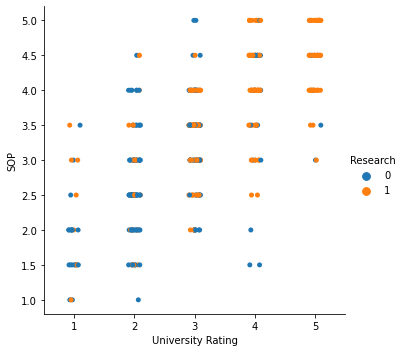

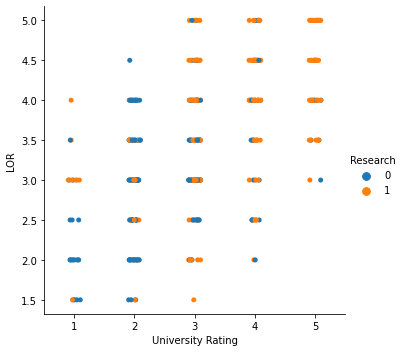

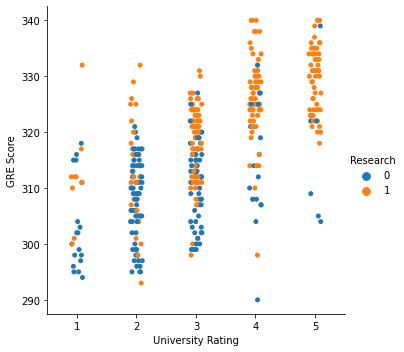

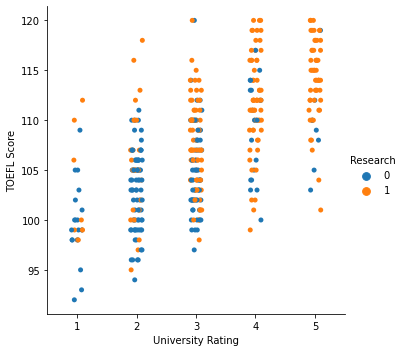

In [ ]:
UniversityRatingAnalysis()